In [83]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.io as sio
import copy
from evaluations import IGDC
"""
plt.rcParams.update({
                    "text.usetex": True,
                    'font.size' : 14,
                    'font.family' : 'serif',
                    'font.serif'  : 'Times New Roman'})"""

#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

'\nplt.rcParams.update({\n                    "text.usetex": True,\n                    \'font.size\' : 14,\n                    \'font.family\' : \'serif\',\n                    \'font.serif\'  : \'Times New Roman\'})'

In [138]:
path2 = "Results/Final/combined results/"

# 1) LastFM

In [153]:
path1 = "data/LastFM/"
path2 = "Results/Final/combined results/"

A = sio.loadmat(path1+'LastFM.mat')['A'].toarray()
F0 = sio.loadmat(path1+'LastFM.mat')['F'].flatten()
F =np.unique(F0, return_inverse=True)[1]
print(A)
print(F)
print(np.shape(A), np.shape(F))

F_lastFM = copy.deepcopy(F)

all_in_one = np.ones(len(F_lastFM))
uniqe_vals, count = np.unique(F_lastFM, return_counts=True)
lastFM_balance = min(count) / max(count)
print("Dataset balance = ", lastFM_balance)

all_competitor = pd.read_csv(path2 + "LastFM_all.csv")
#fair_nmf = pd.read_csv(path2 + "LastFM_k_lam_gridsearch_FNMTF.csv")
fair_nmf = pd.read_csv(path2 + "lfm_sort.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [lastFM_balance for i in range(len(k))]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[5 1 5 ... 3 0 5]
(5576, 5576) (5576,)
Dataset balance =  0.3302812295618051


## 1.1. Comparisons on $Q ~~ \text{and} ~~Balance$

C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\3130731995.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bh" (-> color='b'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\3130731995.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mv" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\3130731995.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mh" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7

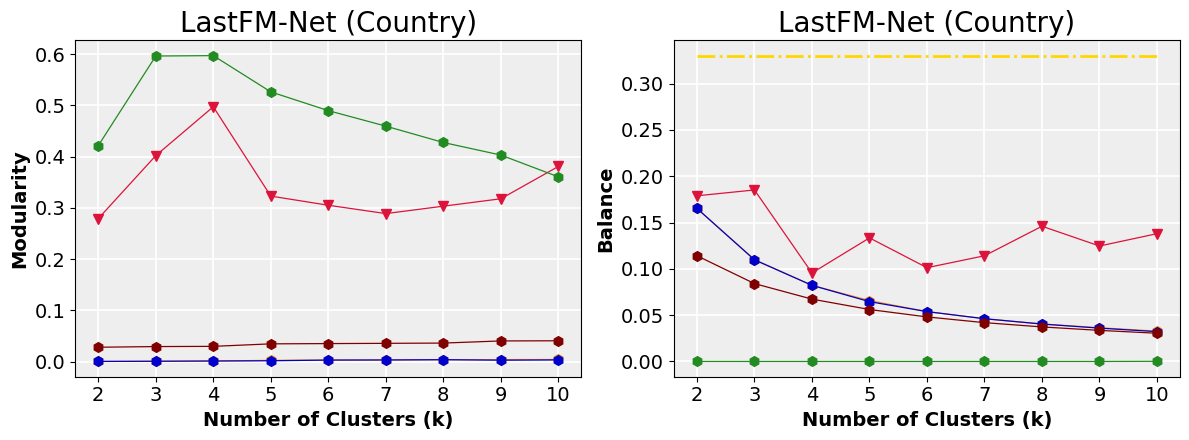

In [154]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5)) #(14,6) with legend. (12,4.5) no legend
styles = ["-bh", "-r^", "-bh", "-mv", "-mh", "-kh", "-gh"]  # ,["-b*","--c*",":k*"]

#lmbd = [3.5, 80, 90-120, 90-110-120, 95-60, 65, 20, 75-20, 10-]
lmbd = [75, 120, 145, 120, 65, 35, 55, 40, 25]
#lmbd = [75, 120, 90, 110, 65, 35, 55, 40, 25]
lmbd = [75, 120, 120, 90, 65, 65, 55, 40, 25]

i_fnmtf_mod, i_fnmtf_bal = [],[]
for i,lam in enumerate(lmbd):
    cluster_rows = fair_nmf[fair_nmf['clusters (k)'] == i+2]
    i_fnmtf_mod.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["Q_FNMTF"].values )
    i_fnmtf_bal.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["B_FNMTF"].values )

#i_fnmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["Q_FNMTF"].values
#i_fnmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["B_FNMTF"].values
#df = fair_nmf.loc[fair_nmf.groupby('clusters (k)')['B_FNMTF'].idxmax()]
#i_fnmtf_mod = df["Q_FNMTF"].values
#i_fnmtf_bal = df["B_FNMTF"].values

i_nmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
i_nmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values

g_sfsc_mod = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["modularity"].values
i_ifsc_mod = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["modularity"].values
g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values
g_dmon_mod = all_competitor.loc[all_competitor['method'] == "DMoN"]["modularity"].values

g_sfsc_bal = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["average balance"].values
i_ifsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_fsc_bal = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values
g_dmon_bal = all_competitor.loc[all_competitor['method'] == "DMoN"]["average balance"].values

# plotting DrugNet-Gender graphs
#axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[0].plot(k, i_nmtf_mod, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[0].plot(k[0:9], g_sfsc_mod[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[0].plot(k[0:9], g_dmon_mod[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

#axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[1].plot(k, i_nmtf_bal, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[1].plot(k[0:9], g_fsc_bal[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[1].plot(k[0:9], i_fnmtf_bal[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[1].plot(k[0:9], i_ifsc_bal[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[1].plot(k[0:9], g_sfsc_bal[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[1].plot(k[0:9], g_dmon_bal[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

axis[1].plot(k[0:9], g_b[0:9], "-.", color="gold", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k[0:9])
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("LastFM-Net (Country)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("LastFM_new_plots.svg", format='svg')
plt.show()

## 1.2. Pareto Analysis and IGDC calculations

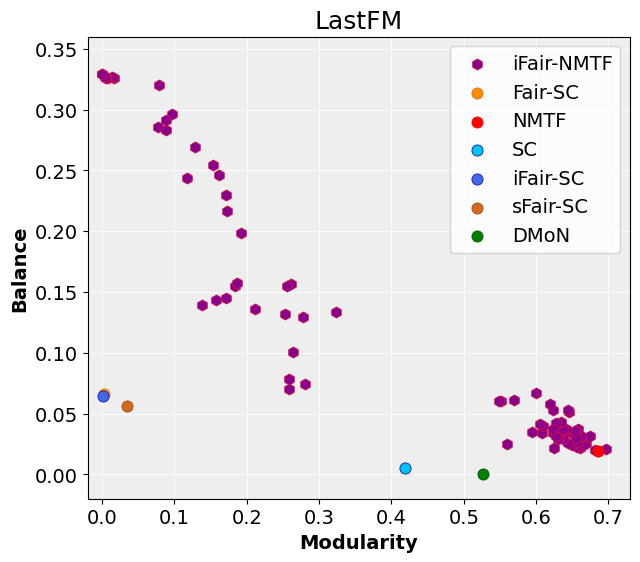

Average IGDC:
iFair_NMTF: 1.090188732801588
sFair-SC: 1.3500992742114013
Fair_SC: 1.3666490902132966
iFair-SC: 1.3680500714765251
DMoN: 1.1065835442102945
Minimum IGDC:
iFair_NMTF: 1.0118393398834078
sFair-SC: 1.3500992742114013
Fair_SC: 1.3666490902132966 
iFair-SC: 1.3680500714765251
DMoN: 1.1065835442102945
  network     attr      method  clusters (k)  avg-IGDC  min-IGDC
0  LastFM  Country  ifair_nmtf             5  1.090189  1.011839
1  LastFM  Country    sfair_sc             5  1.350099  1.350099
2  LastFM  Country     fair_sc             5  1.366649  1.366649
3  LastFM  Country    ifair_sc             5  1.368050  1.368050
4  LastFM  Country        dmon             5  1.106584  1.106584


,network,attr,method,clusters (k),avg-IGDC,min-IGDC
0,LastFM,Country,ifair_nmtf,5,1.090189,1.011839
1,LastFM,Country,sfair_sc,5,1.350099,1.350099
2,LastFM,Country,fair_sc,5,1.366649,1.366649
3,LastFM,Country,ifair_sc,5,1.368050,1.368050
4,LastFM,Country,dmon,5,1.106584,1.106584


In [155]:
ideal = np.asarray([1, 1])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1
    
figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
#axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.set_title(r"LastFM", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="darkmagenta", linewidths = 0.5, marker ="h", edgecolor ="crimson",s = 65, label='iFair-NMTF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="darkorange", linewidths = 0.5, marker ="o", edgecolor ="chocolate",s = 65, label='Fair-SC', zorder=2)
plt.scatter(i_nmtf_mod[ind], i_nmtf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="red",s = 65, label='NMTF', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="deepskyblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(i_ifsc_mod[ind], i_ifsc_bal[ind], c ="royalblue", linewidths = 0.5, marker ="o", edgecolor ="mediumblue",s = 65, label='iFair-SC', zorder=2)
plt.scatter(g_sfsc_mod[ind], g_sfsc_bal[ind], c ="chocolate", linewidths = 0.5, marker ="o", edgecolor ="saddlebrown",s = 65, label='sFair-SC', zorder=2)
plt.scatter(g_dmon_mod[ind], g_dmon_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='DMoN', zorder=2)
#plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')

#plt.hlines(0.35, -0.03, 0.7 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
#plt.vlines(0.70, -0.03, 0.35, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.02, 0.73)
plt.ylim(-0.02, 0.36)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("LastFM.svg", format='svg')
plt.show()

igdc_avg_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'avg')
igdc_avg_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\niFair_NMTF: {igdc_avg_ifnmtf}\nsFair-SC: {igdc_avg_sfsc}\nFair_SC: {igdc_avg_fsc}\niFair-SC: {igdc_avg_ifsc}\nDMoN: {igdc_avg_dmon}")

igdc_min_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'min')
igdc_min_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\niFair_NMTF: {igdc_min_ifnmtf}\nsFair-SC: {igdc_min_sfsc}\nFair_SC: {igdc_min_fsc} \niFair-SC: {igdc_min_ifsc}\nDMoN: {igdc_min_dmon}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["LastFM" for i in range(5)]
col2 = ["Country" for i in range(5)]
col3 = ["ifair_nmtf", "sfair_sc", "fair_sc", "ifair_sc", "dmon"]
col4 = [num_c for i in range(5)]
col5 = [igdc_avg_ifnmtf, igdc_avg_sfsc, igdc_avg_fsc, igdc_avg_ifsc, igdc_avg_dmon]
col6 = [igdc_min_ifnmtf, igdc_min_sfsc, igdc_min_fsc, igdc_min_ifsc, igdc_min_dmon]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_LastFM_.csv', index=False)


## 1.3. Parameter ($\lambda$) analysis

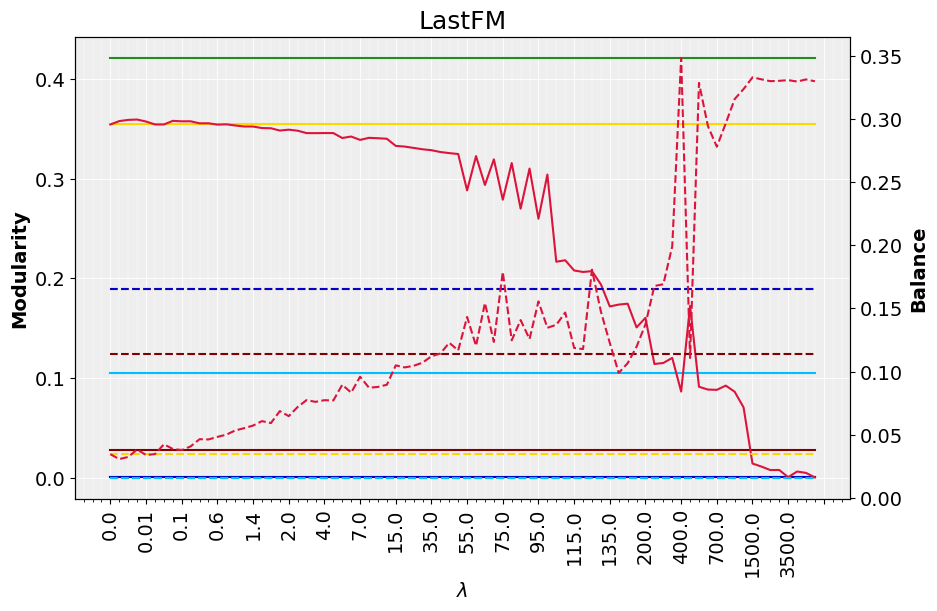

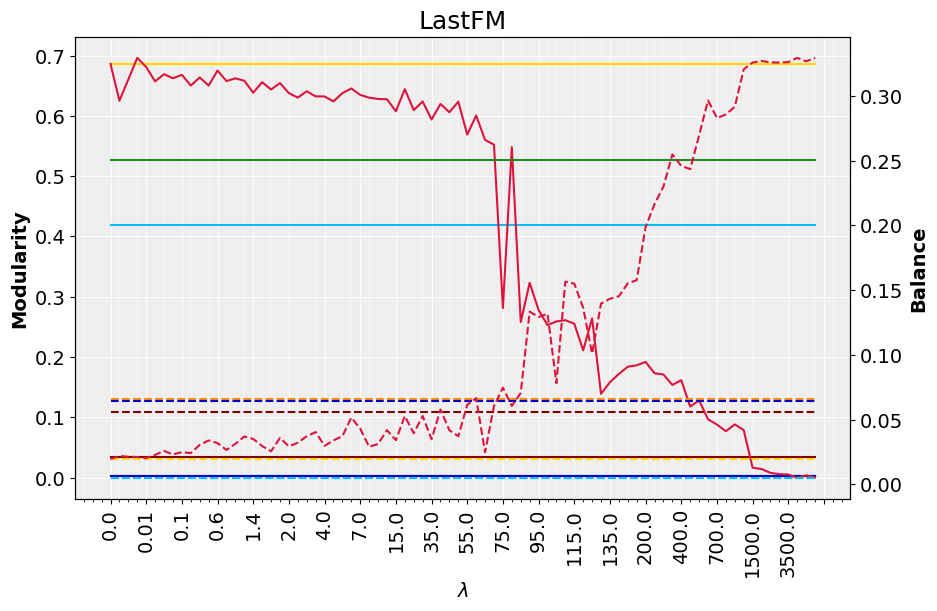

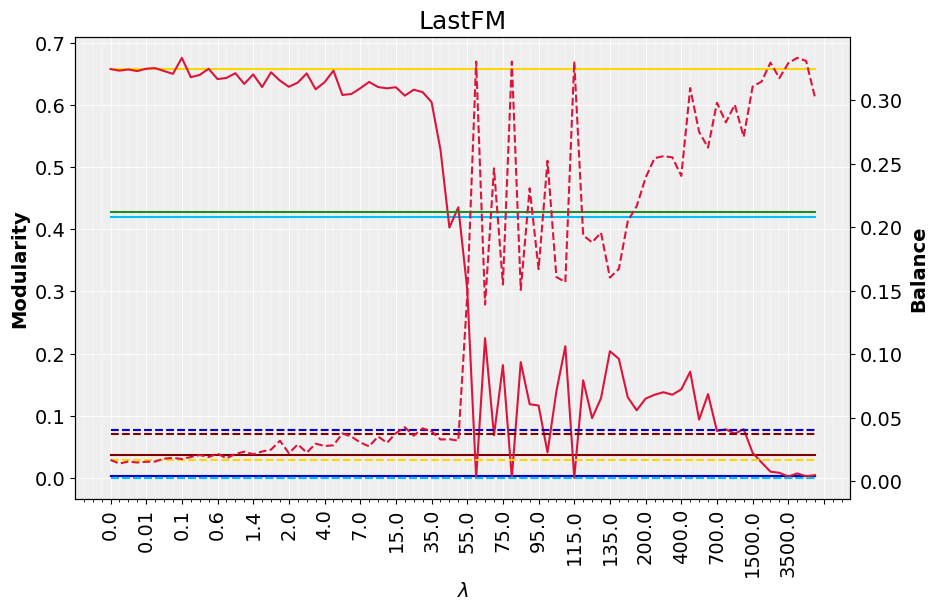

In [156]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6
    
    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values
    nmf_m= fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
    nmf_b = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sfsc_mod = np.repeat(g_sfsc_mod[ind], len(lam))
    sfsc_bal = np.repeat(g_sfsc_bal[ind], len(lam))
    fsc_mod = np.repeat(g_fsc_mod[ind], len(lam))
    fsc_bal = np.repeat(g_fsc_bal[ind], len(lam))
    ifsc_mod = np.repeat(i_ifsc_mod[ind], len(lam))
    ifsc_bal = np.repeat(i_ifsc_bal[ind], len(lam))
    dmon_mod = np.repeat(g_dmon_mod[ind], len(lam))
    dmon_bal = np.repeat(g_dmon_bal[ind], len(lam))
    nmf_mod = np.repeat(nmf_m[num_c-2], len(lam))
    nmf_bal = np.repeat(nmf_b[num_c-2], len(lam))
    sc_mod = np.repeat(g_sc_mod[ind], len(lam))
    sc_bal = np.repeat(g_sc_bal[ind], len(lam))

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"LastFM", fontsize=18)
    #axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14) #labelsize=14

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "deepskyblue")
    p2 = axis.plot(x, nmf_mod,  label='NMTF modularity', markersize=7, linewidth=1.5, c = "gold")
    p3 = axis.plot(x, sfsc_mod,   label='sFSC modularity', markersize=7, linewidth=1.5, c = "maroon")
    p4 = axis.plot(x, fsc_mod,  label='FSC modularity', markersize=7, linewidth=1.5, c = "darkorange")
    p5 = axis.plot(x, ifsc_mod,  label='iFair-SC modularity', markersize=7, linewidth=1.5, c = "mediumblue")
    p6 = axis.plot(x, fnmf_mod, label='iFairNMTF modularity', markersize=7, linewidth=1.5, c = "crimson")
    p7 = axis.plot(x, dmon_mod,  label='DMoN modularity', markersize=7, linewidth=1.5, c = "forestgreen")

    p8 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "deepskyblue")
    p9 = axis2.plot(x, nmf_bal, label='NMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "gold")
    p10 = axis2.plot(x, sfsc_bal,  label='sFSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "maroon")
    p11 = axis2.plot(x, fsc_bal, label='FSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "darkorange")
    p12 = axis2.plot(x, ifsc_bal, label='iFair-SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "mediumblue")
    p13 = axis2.plot(x, fnmf_bal,label='iFairNMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "crimson")
    p14 = axis.plot(x, dmon_bal,  label='DMoN balance', markersize=7, linewidth=1.5, linestyle = "--", c = "forestgreen")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend
    plots = p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("LastFM_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()


# 2) DrugNET_ethnicity

In [84]:
path1 = "data/DrugNet/CSV/"
path2 = "Results/Final/combined results/"

DrugNet_ethnicity_balance =  0.13761467889908258
DrugNet_gender_balance =     0.2671232876712329

all_competitor = pd.read_csv(path2 + "DrugNET_ethnicity_all.csv")
fair_nmf = pd.read_csv(path2 + "DrugNET_ethnicity_k_lam_gridsearch_FNMTF.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [DrugNet_ethnicity_balance for i in range(len(k))]

## 2.1. Comparisons on $Q ~~ \text{and} ~~Balance$

C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\4102918642.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bh" (-> color='b'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\4102918642.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mv" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\4102918642.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mh" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7

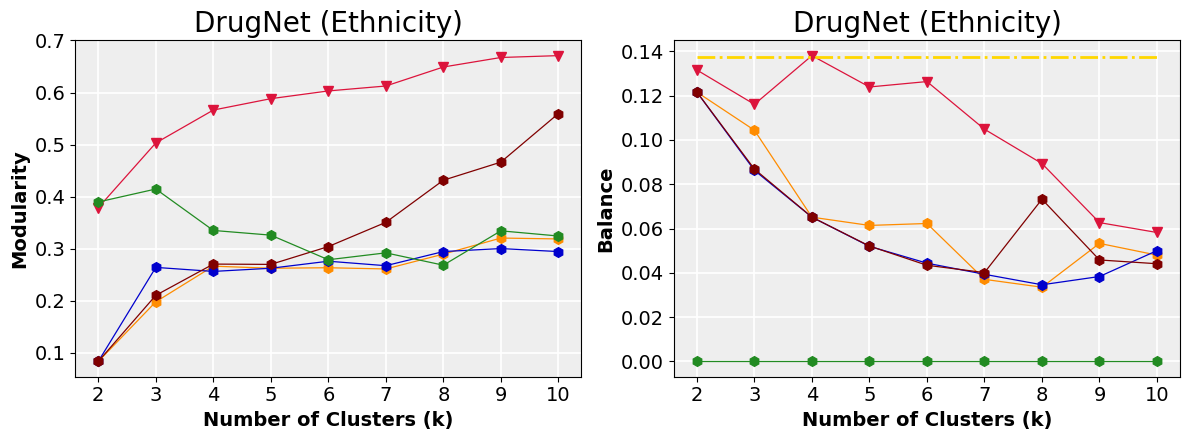

In [85]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5)) #(14,6) with legend. (12,4.5) no legend
styles = ["-bh", "-r^", "-bh", "-mv", "-mh", "-kh", "-gh"]  # ,["-b*","--c*",":k*"]

#lmbd = [3.5, 1, 0.2, 1.2, 0.5, 0.01, 0.001, 1.5, 0.025]
lmbd = [3.5, 1, 0.2, 1.2, 0.5, 0.01, 0.001, 0.005, 0.025]

i_fnmtf_mod, i_fnmtf_bal = [],[]
for i,lam in enumerate(lmbd):
    cluster_rows = fair_nmf[fair_nmf['clusters (k)'] == i+2]
    i_fnmtf_mod.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["Q_FNMTF"].values )
    i_fnmtf_bal.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["B_FNMTF"].values )

#i_fnmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["Q_FNMTF"].values
#i_fnmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["B_FNMTF"].values
#df = fair_nmf.loc[fair_nmf.groupby('clusters (k)')['B_FNMTF'].idxmax()]
#i_fnmtf_mod = df["Q_FNMTF"].values
#i_fnmtf_bal = df["B_FNMTF"].values

i_nmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
i_nmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values

g_sfsc_mod = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["modularity"].values
i_ifsc_mod = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["modularity"].values
g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values
g_dmon_mod = all_competitor.loc[all_competitor['method'] == "DMoN"]["modularity"].values

g_sfsc_bal = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["average balance"].values
i_ifsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_fsc_bal = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values
g_dmon_bal = all_competitor.loc[all_competitor['method'] == "DMoN"]["average balance"].values

# plotting DrugNet-Gender graphs
#axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[0].plot(k, i_nmtf_mod, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[0].plot(k[0:9], g_sfsc_mod[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[0].plot(k[0:9], g_dmon_mod[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

#axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[1].plot(k, i_nmtf_bal, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[1].plot(k[0:9], g_fsc_bal[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[1].plot(k[0:9], i_fnmtf_bal[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[1].plot(k[0:9], i_ifsc_bal[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[1].plot(k[0:9], g_sfsc_bal[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[1].plot(k[0:9], g_dmon_bal[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

axis[1].plot(k[0:9], g_b[0:9], "-.", color="gold", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k[0:9])
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("DrugNet (Ethnicity)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("DrugNet_ethnicity_new_plots.svg", format='svg')
plt.show()

## 2.2. Parameter ($\lambda$) analysis

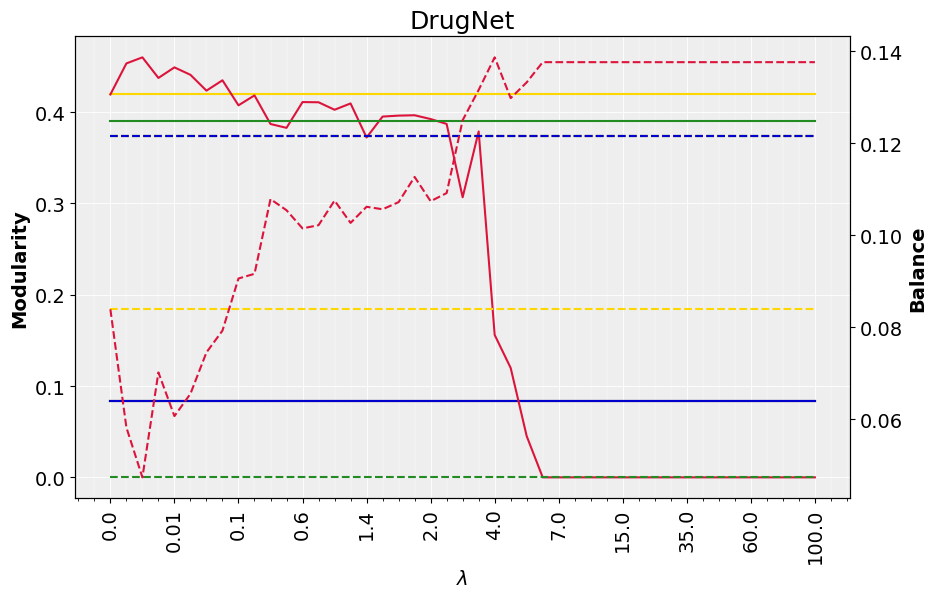

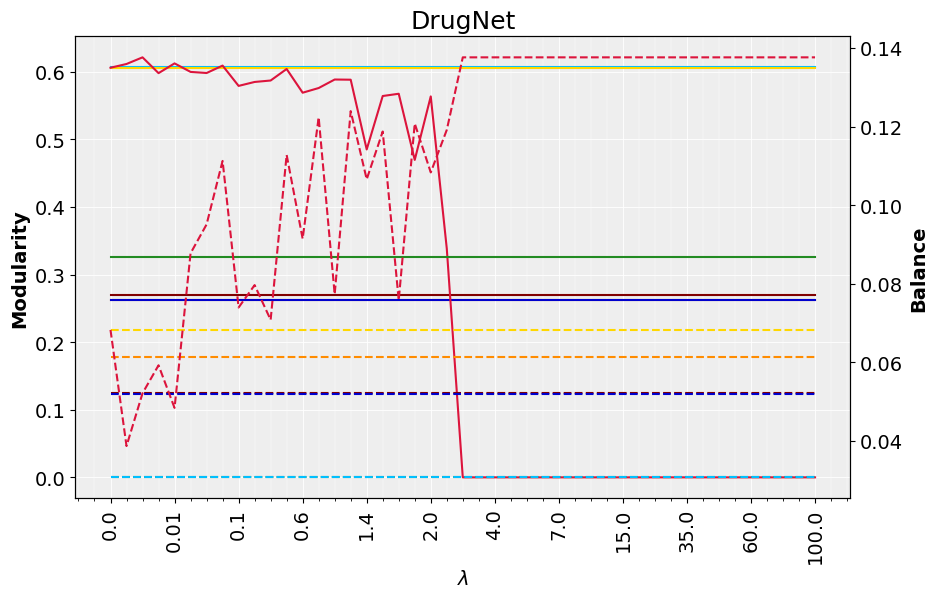

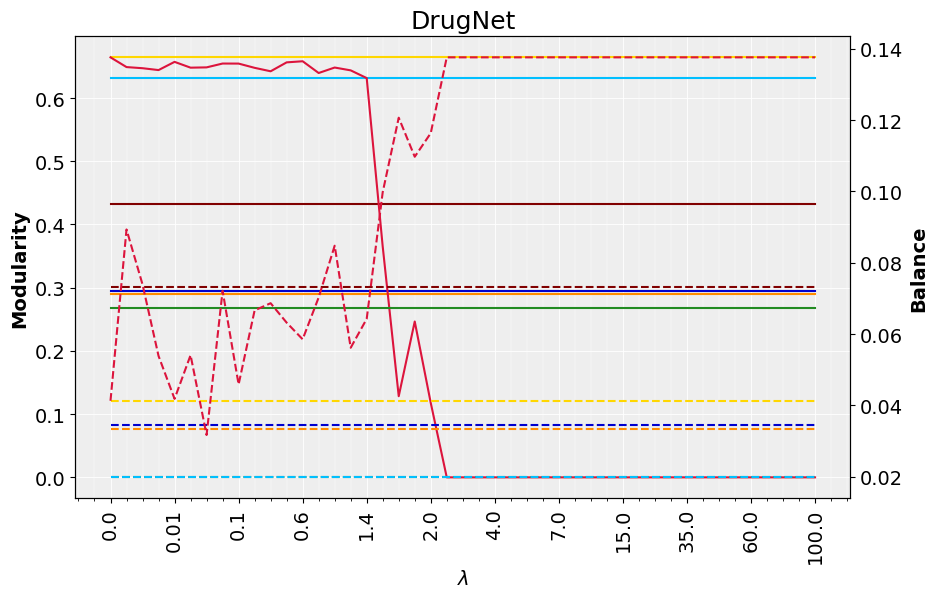

In [86]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6
    
    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values
    nmf_m= fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
    nmf_b = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sfsc_mod = np.repeat(g_sfsc_mod[ind], len(lam))
    sfsc_bal = np.repeat(g_sfsc_bal[ind], len(lam))
    fsc_mod = np.repeat(g_fsc_mod[ind], len(lam))
    fsc_bal = np.repeat(g_fsc_bal[ind], len(lam))
    ifsc_mod = np.repeat(i_ifsc_mod[ind], len(lam))
    ifsc_bal = np.repeat(i_ifsc_bal[ind], len(lam))
    dmon_mod = np.repeat(g_dmon_mod[ind], len(lam))
    dmon_bal = np.repeat(g_dmon_bal[ind], len(lam))
    nmf_mod = np.repeat(nmf_m[num_c-2], len(lam))
    nmf_bal = np.repeat(nmf_b[num_c-2], len(lam))
    sc_mod = np.repeat(g_sc_mod[ind], len(lam))
    sc_bal = np.repeat(g_sc_bal[ind], len(lam))

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"DrugNet", fontsize=18)
    #axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14) #labelsize=14

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "deepskyblue")
    p2 = axis.plot(x, nmf_mod,  label='NMTF modularity', markersize=7, linewidth=1.5, c = "gold")
    p3 = axis.plot(x, sfsc_mod,   label='sFSC modularity', markersize=7, linewidth=1.5, c = "maroon")
    p4 = axis.plot(x, fsc_mod,  label='FSC modularity', markersize=7, linewidth=1.5, c = "darkorange")
    p5 = axis.plot(x, ifsc_mod,  label='iFair-SC modularity', markersize=7, linewidth=1.5, c = "mediumblue")
    p6 = axis.plot(x, fnmf_mod, label='iFairNMTF modularity', markersize=7, linewidth=1.5, c = "crimson")
    p7 = axis.plot(x, dmon_mod,  label='DMoN modularity', markersize=7, linewidth=1.5, c = "forestgreen")

    p8 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "deepskyblue")
    p9 = axis2.plot(x, nmf_bal, label='NMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "gold")
    p10 = axis2.plot(x, sfsc_bal,  label='sFSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "maroon")
    p11 = axis2.plot(x, fsc_bal, label='FSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "darkorange")
    p12 = axis2.plot(x, ifsc_bal, label='iFair-SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "mediumblue")
    p13 = axis2.plot(x, fnmf_bal,label='iFairNMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "crimson")
    p14 = axis.plot(x, dmon_bal,  label='DMoN balance', markersize=7, linewidth=1.5, linestyle = "--", c = "forestgreen")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend
    plots = p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("DrugNet_ethnicity_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()

## 2.3. Pareto Analysis and IGDC calculations

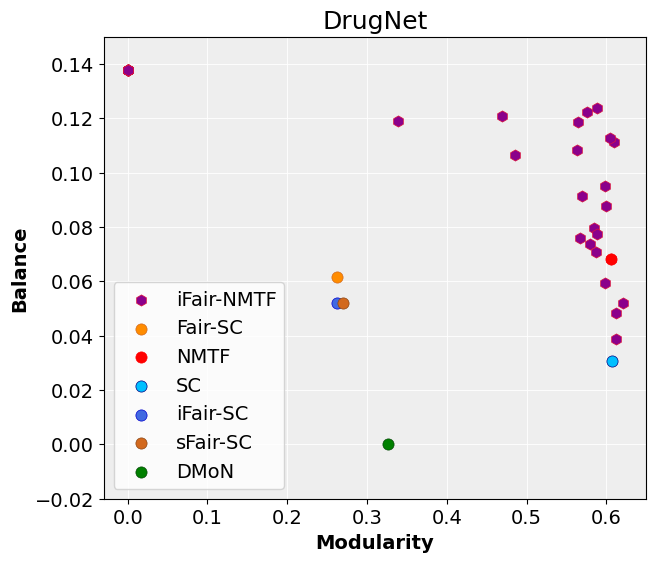

Average IGDC:
iFair_NMTF: 1.1684241134412472
sFair-SC: 1.1963978855708617
Fair_SC: 1.1935987017836698
iFair-SC: 1.2010318028112656
DMoN: 1.20583708766288
Minimum IGDC:
iFair_NMTF: 0.9680445908815303
sFair-SC: 1.1963978855708617
Fair_SC: 1.1935987017836698 
iFair-SC: 1.2010318028112656
DMoN: 1.20583708766288
   network     attr      method  clusters (k)  avg-IGDC  min-IGDC
0  DrugNet  Country  ifair_nmtf             5  1.168424  0.968045
1  DrugNet  Country    sfair_sc             5  1.196398  1.196398
2  DrugNet  Country     fair_sc             5  1.193599  1.193599
3  DrugNet  Country    ifair_sc             5  1.201032  1.201032
4  DrugNet  Country        dmon             5  1.205837  1.205837


,network,attr,method,clusters (k),avg-IGDC,min-IGDC
0,DrugNet,Country,ifair_nmtf,5,1.168424,0.968045
1,DrugNet,Country,sfair_sc,5,1.196398,1.196398
2,DrugNet,Country,fair_sc,5,1.193599,1.193599
3,DrugNet,Country,ifair_sc,5,1.201032,1.201032
4,DrugNet,Country,dmon,5,1.205837,1.205837


In [30]:
ideal = np.asarray([1, 1])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1
    
figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
#axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.set_title(r"DrugNet", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="darkmagenta", linewidths = 0.5, marker ="h", edgecolor ="crimson",s = 65, label='iFair-NMTF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="darkorange", linewidths = 0.5, marker ="o", edgecolor ="chocolate",s = 65, label='Fair-SC', zorder=2)
plt.scatter(i_nmtf_mod[ind], i_nmtf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="red",s = 65, label='NMTF', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="deepskyblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(i_ifsc_mod[ind], i_ifsc_bal[ind], c ="royalblue", linewidths = 0.5, marker ="o", edgecolor ="mediumblue",s = 65, label='iFair-SC', zorder=2)
plt.scatter(g_sfsc_mod[ind], g_sfsc_bal[ind], c ="chocolate", linewidths = 0.5, marker ="o", edgecolor ="saddlebrown",s = 65, label='sFair-SC', zorder=2)
plt.scatter(g_dmon_mod[ind], g_dmon_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='DMoN', zorder=2)
#plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')

#plt.hlines(0.35, -0.03, 0.7 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
#plt.vlines(0.70, -0.03, 0.35, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.03, 0.65)
plt.ylim(-0.02, 0.15)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_DrugNet.svg", format='svg')
plt.show()

igdc_avg_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'avg')
igdc_avg_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\niFair_NMTF: {igdc_avg_ifnmtf}\nsFair-SC: {igdc_avg_sfsc}\nFair_SC: {igdc_avg_fsc}\niFair-SC: {igdc_avg_ifsc}\nDMoN: {igdc_avg_dmon}")

igdc_min_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'min')
igdc_min_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\niFair_NMTF: {igdc_min_ifnmtf}\nsFair-SC: {igdc_min_sfsc}\nFair_SC: {igdc_min_fsc} \niFair-SC: {igdc_min_ifsc}\nDMoN: {igdc_min_dmon}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["DrugNet" for i in range(5)]
col2 = ["Country" for i in range(5)]
col3 = ["ifair_nmtf", "sfair_sc", "fair_sc", "ifair_sc", "dmon"]
col4 = [num_c for i in range(5)]
col5 = [igdc_avg_ifnmtf, igdc_avg_sfsc, igdc_avg_fsc, igdc_avg_ifsc, igdc_avg_dmon]
col6 = [igdc_min_ifnmtf, igdc_min_sfsc, igdc_min_fsc, igdc_min_ifsc, igdc_min_dmon]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_DrugNet_ethnicity_.csv', index=False)


# 3) Contact Diaries

In [87]:
path1 = "data/School/"
path2 = "Results/Final/combined results/"

Diaries_balance =  0.7647058823529411

all_competitor = pd.read_csv(path2 + "Diaries_all.csv")
fair_nmf = pd.read_csv(path2 + "Diaries_k_lam_gridsearch_FNMTF.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [Diaries_balance for i in range(len(k))]

## 3.1. Comparisons on $Q ~~ \text{and} ~~Balance$

C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\214976164.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bh" (-> color='b'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\214976164.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mv" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\214976164.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mh" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7, l

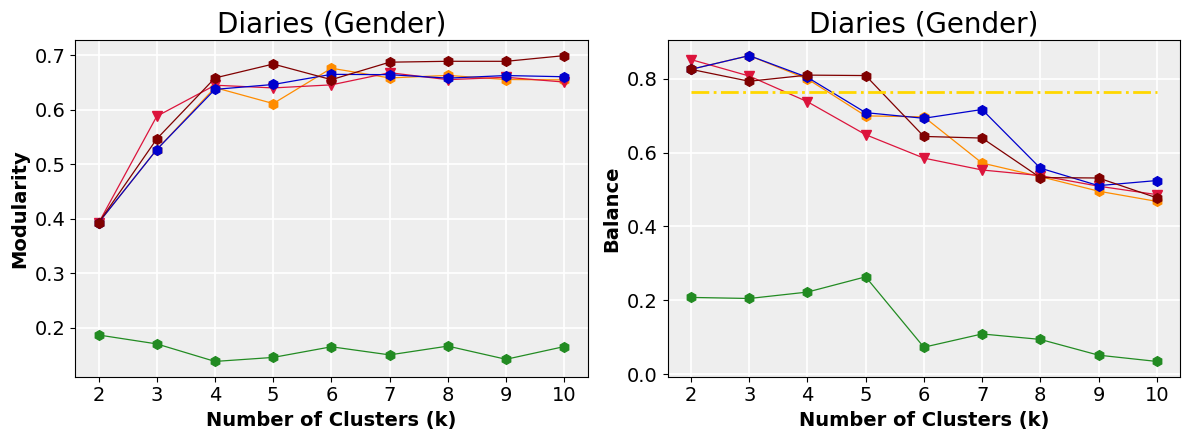

In [88]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5)) #(14,6) with legend. (12,4.5) no legend
styles = ["-bh", "-r^", "-bh", "-mv", "-mh", "-kh", "-gh"]  # ,["-b*","--c*",":k*"]

#lmbd = [0.1, 4, 4, 3.5, 5, 2, 0.8, 1.4, 1.6]
lmbd = [0.1, 4, 4, 3.5, 4, 2, 0.8, 0.2, 1.6]

i_fnmtf_mod, i_fnmtf_bal = [],[]
for i,lam in enumerate(lmbd):
    cluster_rows = fair_nmf[fair_nmf['clusters (k)'] == i+2]
    i_fnmtf_mod.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["Q_FNMTF"].values )
    i_fnmtf_bal.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["B_FNMTF"].values )

#i_fnmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["Q_FNMTF"].values
#i_fnmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["B_FNMTF"].values
#df = fair_nmf.loc[fair_nmf.groupby('clusters (k)')['B_FNMTF'].idxmax()]
#i_fnmtf_mod = df["Q_FNMTF"].values
#i_fnmtf_bal = df["B_FNMTF"].values

i_nmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
i_nmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values

g_sfsc_mod = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["modularity"].values
i_ifsc_mod = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["modularity"].values
g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values
g_dmon_mod = all_competitor.loc[all_competitor['method'] == "DMoN"]["modularity"].values

g_sfsc_bal = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["average balance"].values
i_ifsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_fsc_bal = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values
g_dmon_bal = all_competitor.loc[all_competitor['method'] == "DMoN"]["average balance"].values

# plotting DrugNet-Gender graphs
#axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[0].plot(k, i_nmtf_mod, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[0].plot(k[0:9], g_sfsc_mod[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[0].plot(k[0:9], g_dmon_mod[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

#axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[1].plot(k, i_nmtf_bal, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[1].plot(k[0:9], g_fsc_bal[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[1].plot(k[0:9], i_fnmtf_bal[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[1].plot(k[0:9], i_ifsc_bal[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[1].plot(k[0:9], g_sfsc_bal[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[1].plot(k[0:9], g_dmon_bal[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

axis[1].plot(k[0:9], g_b[0:9], "-.", color="gold", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k[0:9])
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("Diaries (Gender)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("Diaries_new_plots.svg", format='svg')
plt.show()

## 3.2. Parameter ($\lambda$) analysis

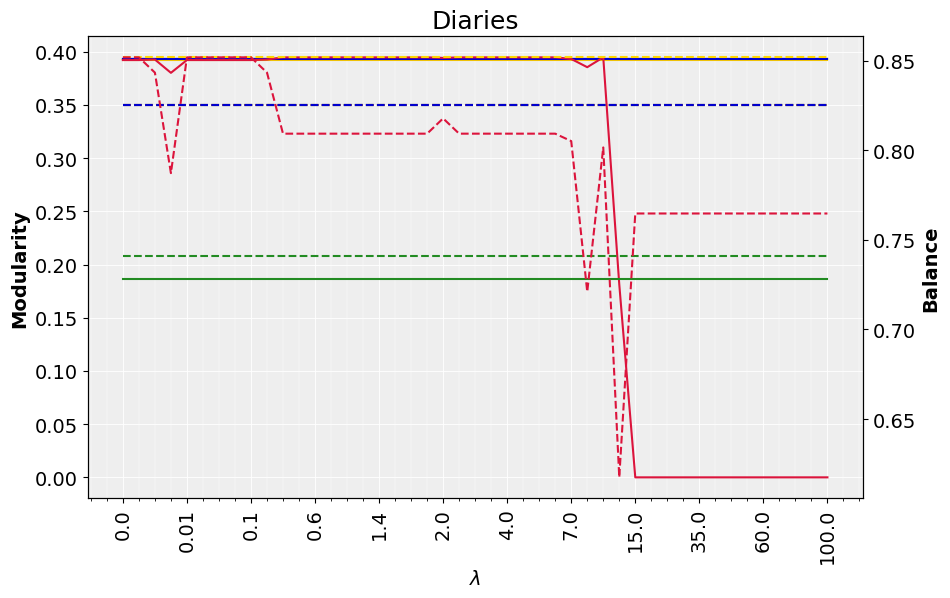

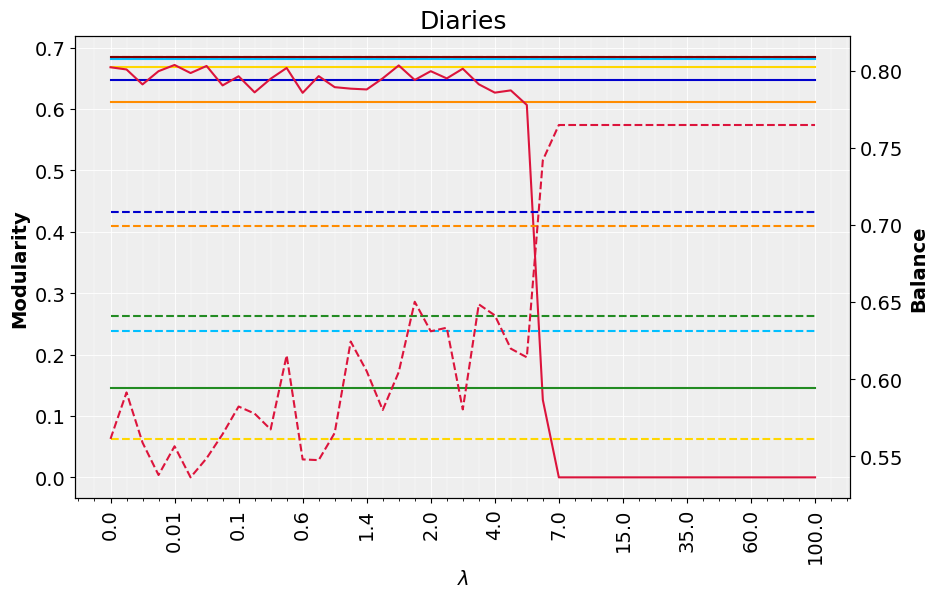

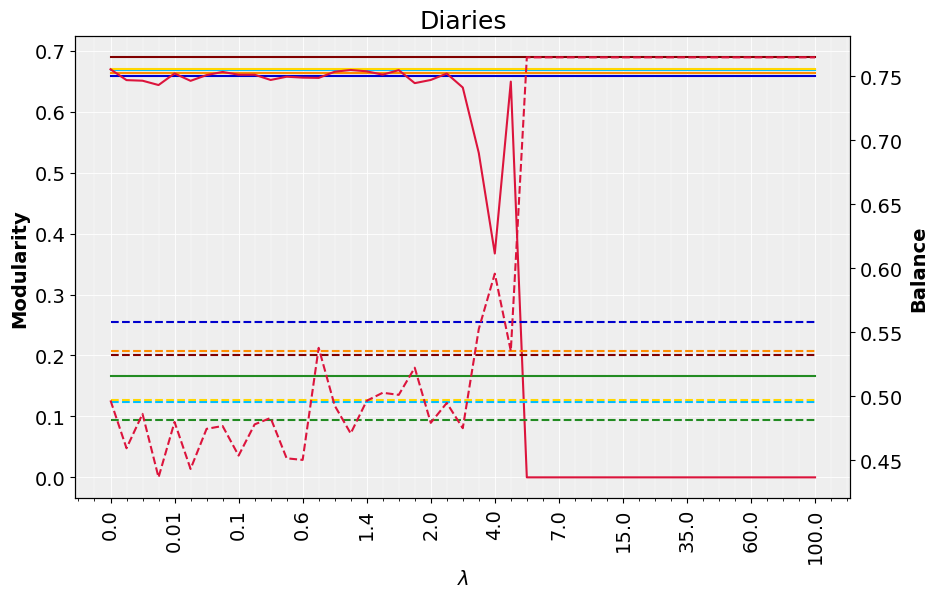

In [89]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6
    
    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values
    nmf_m= fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
    nmf_b = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sfsc_mod = np.repeat(g_sfsc_mod[ind], len(lam))
    sfsc_bal = np.repeat(g_sfsc_bal[ind], len(lam))
    fsc_mod = np.repeat(g_fsc_mod[ind], len(lam))
    fsc_bal = np.repeat(g_fsc_bal[ind], len(lam))
    ifsc_mod = np.repeat(i_ifsc_mod[ind], len(lam))
    ifsc_bal = np.repeat(i_ifsc_bal[ind], len(lam))
    dmon_mod = np.repeat(g_dmon_mod[ind], len(lam))
    dmon_bal = np.repeat(g_dmon_bal[ind], len(lam))
    nmf_mod = np.repeat(nmf_m[num_c-2], len(lam))
    nmf_bal = np.repeat(nmf_b[num_c-2], len(lam))
    sc_mod = np.repeat(g_sc_mod[ind], len(lam))
    sc_bal = np.repeat(g_sc_bal[ind], len(lam))

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"Diaries", fontsize=18)
    #axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14) #labelsize=14

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "deepskyblue")
    p2 = axis.plot(x, nmf_mod,  label='NMTF modularity', markersize=7, linewidth=1.5, c = "gold")
    p3 = axis.plot(x, sfsc_mod,   label='sFSC modularity', markersize=7, linewidth=1.5, c = "maroon")
    p4 = axis.plot(x, fsc_mod,  label='FSC modularity', markersize=7, linewidth=1.5, c = "darkorange")
    p5 = axis.plot(x, ifsc_mod,  label='iFair-SC modularity', markersize=7, linewidth=1.5, c = "mediumblue")
    p6 = axis.plot(x, fnmf_mod, label='iFairNMTF modularity', markersize=7, linewidth=1.5, c = "crimson")
    p7 = axis.plot(x, dmon_mod,  label='DMoN modularity', markersize=7, linewidth=1.5, c = "forestgreen")

    p8 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "deepskyblue")
    p9 = axis2.plot(x, nmf_bal, label='NMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "gold")
    p10 = axis2.plot(x, sfsc_bal,  label='sFSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "maroon")
    p11 = axis2.plot(x, fsc_bal, label='FSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "darkorange")
    p12 = axis2.plot(x, ifsc_bal, label='iFair-SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "mediumblue")
    p13 = axis2.plot(x, fnmf_bal,label='iFairNMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "crimson")
    p14 = axis.plot(x, dmon_bal,  label='DMoN balance', markersize=7, linewidth=1.5, linestyle = "--", c = "forestgreen")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend
    plots = p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("Diaries_ethnicity_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()

## 4.3. Pareto Analysis and IGDC calculations

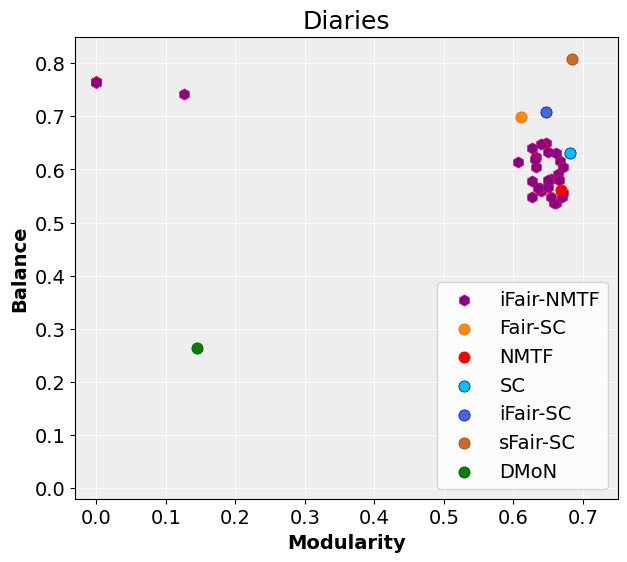

Average IGDC:
iFair_NMTF: 0.7337036929739356
sFair-SC: 0.36938005854509104
Fair_SC: 0.49119929597601414
iFair-SC: 0.4583972827142833
DMoN: 1.1281192813002832
Minimum IGDC:
iFair_NMTF: 0.4968543608238919
sFair-SC: 0.36938005854509104
Fair_SC: 0.49119929597601414 
iFair-SC: 0.4583972827142833
DMoN: 1.1281192813002832
   network    attr      method  clusters (k)  avg-IGDC  min-IGDC
0  Diaries  Gender  ifair_nmtf             5  0.733704  0.496854
1  Diaries  Gender    sfair_sc             5  0.369380  0.369380
2  Diaries  Gender     fair_sc             5  0.491199  0.491199
3  Diaries  Gender    ifair_sc             5  0.458397  0.458397
4  Diaries  Gender        dmon             5  1.128119  1.128119


,network,attr,method,clusters (k),avg-IGDC,min-IGDC
0,Diaries,Gender,ifair_nmtf,5,0.733704,0.496854
1,Diaries,Gender,sfair_sc,5,0.369380,0.369380
2,Diaries,Gender,fair_sc,5,0.491199,0.491199
3,Diaries,Gender,ifair_sc,5,0.458397,0.458397
4,Diaries,Gender,dmon,5,1.128119,1.128119


In [40]:
ideal = np.asarray([1, 1])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1

figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
#axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.set_title(r"Diaries", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="darkmagenta", linewidths = 0.5, marker ="h", edgecolor ="crimson",s = 65, label='iFair-NMTF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="darkorange", linewidths = 0.5, marker ="o", edgecolor ="chocolate",s = 65, label='Fair-SC', zorder=2)
plt.scatter(i_nmtf_mod[ind], i_nmtf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="red",s = 65, label='NMTF', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="deepskyblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(i_ifsc_mod[ind], i_ifsc_bal[ind], c ="royalblue", linewidths = 0.5, marker ="o", edgecolor ="mediumblue",s = 65, label='iFair-SC', zorder=2)
plt.scatter(g_sfsc_mod[ind], g_sfsc_bal[ind], c ="chocolate", linewidths = 0.5, marker ="o", edgecolor ="saddlebrown",s = 65, label='sFair-SC', zorder=2)
plt.scatter(g_dmon_mod[ind], g_dmon_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='DMoN', zorder=2)
#plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')

#plt.hlines(0.35, -0.03, 0.7 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
#plt.vlines(0.70, -0.03, 0.35, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.03, 0.75)
plt.ylim(-0.02, 0.85)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_Diaries.svg", format='svg')
plt.show()

igdc_avg_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'avg')
igdc_avg_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\niFair_NMTF: {igdc_avg_ifnmtf}\nsFair-SC: {igdc_avg_sfsc}\nFair_SC: {igdc_avg_fsc}\niFair-SC: {igdc_avg_ifsc}\nDMoN: {igdc_avg_dmon}")

igdc_min_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'min')
igdc_min_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\niFair_NMTF: {igdc_min_ifnmtf}\nsFair-SC: {igdc_min_sfsc}\nFair_SC: {igdc_min_fsc} \niFair-SC: {igdc_min_ifsc}\nDMoN: {igdc_min_dmon}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["Diaries" for i in range(5)]
col2 = ["Gender" for i in range(5)]
col3 = ["ifair_nmtf", "sfair_sc", "fair_sc", "ifair_sc", "dmon"]
col4 = [num_c for i in range(5)]
col5 = [igdc_avg_ifnmtf, igdc_avg_sfsc, igdc_avg_fsc, igdc_avg_ifsc, igdc_avg_dmon]
col6 = [igdc_min_ifnmtf, igdc_min_sfsc, igdc_min_fsc, igdc_min_ifsc, igdc_min_dmon]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_Diaries_.csv', index=False)


# 5) Facebook

In [90]:
path1 = "data/School/"
path2 = "Results/Final/combined results/"

Facebook_balance =  0.8235294117647058

all_competitor = pd.read_csv(path2 + "Facebook_all.csv")
fair_nmf = pd.read_csv(path2 + "Facebook_k_lam_gridsearch_FNMTF.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [Facebook_balance for i in range(len(k))]

## 5.1. Comparisons on $Q ~~ \text{and} ~~Balance$

C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\4082202844.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bh" (-> color='b'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\4082202844.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mv" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\4082202844.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mh" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7

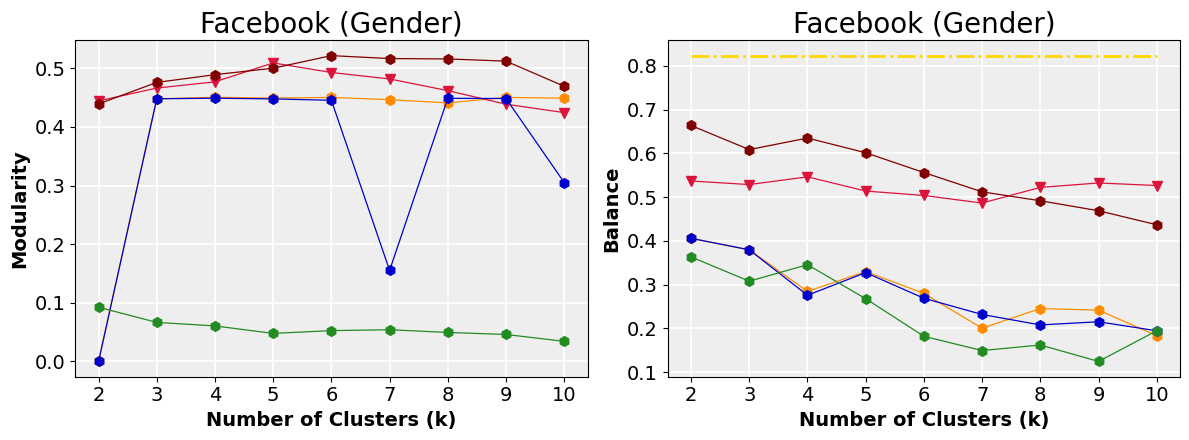

In [91]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5)) #(14,6) with legend. (12,4.5) no legend
styles = ["-bh", "-r^", "-bh", "-mv", "-mh", "-kh", "-gh"]  # ,["-b*","--c*",":k*"]

#lmbd = [0.1, 4, 4, 3.5, 5, 2, 0.8, 1.4, 1.6]
lmbd = [100, 35, 70, 40, 1.6, 3.5, 0.4, 0.075, 0.0075]

i_fnmtf_mod, i_fnmtf_bal = [],[]
for i,lam in enumerate(lmbd):
    cluster_rows = fair_nmf[fair_nmf['clusters (k)'] == i+2]
    i_fnmtf_mod.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["Q_FNMTF"].values )
    i_fnmtf_bal.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["B_FNMTF"].values )

#i_fnmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["Q_FNMTF"].values
#i_fnmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["B_FNMTF"].values
#df = fair_nmf.loc[fair_nmf.groupby('clusters (k)')['B_FNMTF'].idxmax()]
#i_fnmtf_mod = df["Q_FNMTF"].values
#i_fnmtf_bal = df["B_FNMTF"].values

i_nmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
i_nmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values

g_sfsc_mod = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["modularity"].values
i_ifsc_mod = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["modularity"].values
g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values
g_dmon_mod = all_competitor.loc[all_competitor['method'] == "DMoN"]["modularity"].values

g_sfsc_bal = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["average balance"].values
i_ifsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_fsc_bal = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values
g_dmon_bal = all_competitor.loc[all_competitor['method'] == "DMoN"]["average balance"].values

# plotting DrugNet-Gender graphs
#axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[0].plot(k, i_nmtf_mod, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[0].plot(k[0:9], g_sfsc_mod[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[0].plot(k[0:9], g_dmon_mod[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

#axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[1].plot(k, i_nmtf_bal, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[1].plot(k[0:9], g_fsc_bal[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[1].plot(k[0:9], i_fnmtf_bal[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[1].plot(k[0:9], i_ifsc_bal[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[1].plot(k[0:9], g_sfsc_bal[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[1].plot(k[0:9], g_dmon_bal[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

axis[1].plot(k[0:9], g_b[0:9], "-.", color="gold", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k[0:9])
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("Facebook (Gender)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("Facebook_new_plots.svg", format='svg')
plt.show()

## 5.2. Parameter ($\lambda$) analysis

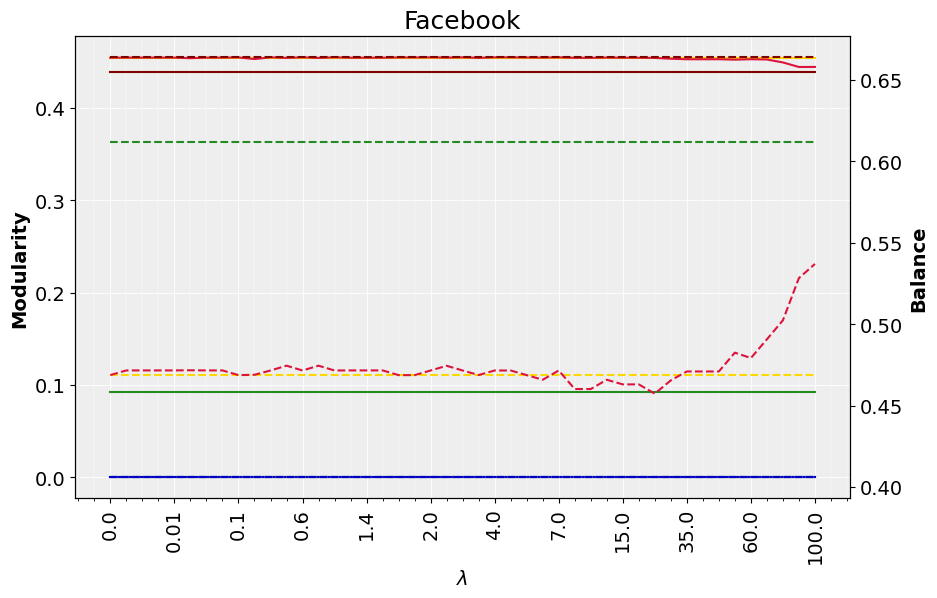

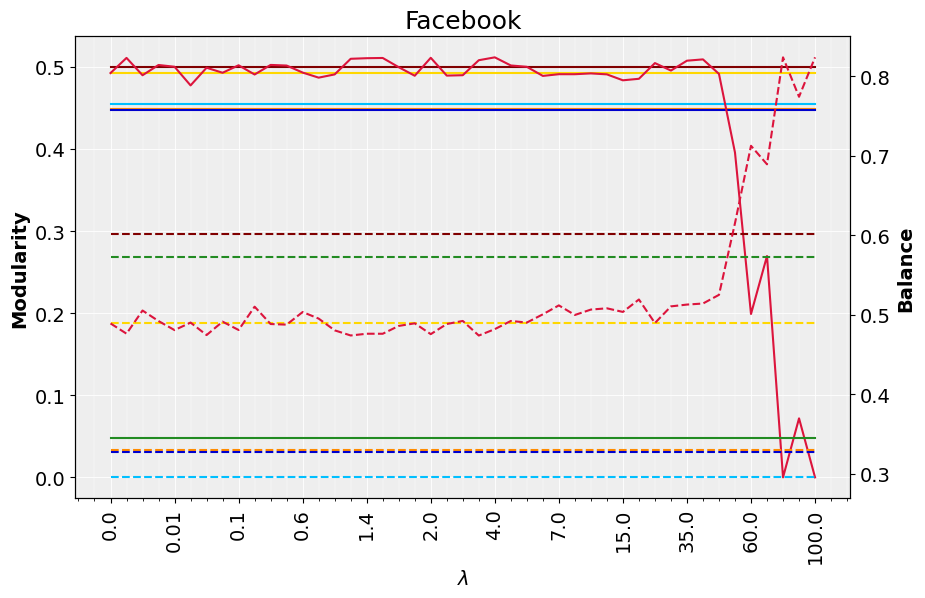

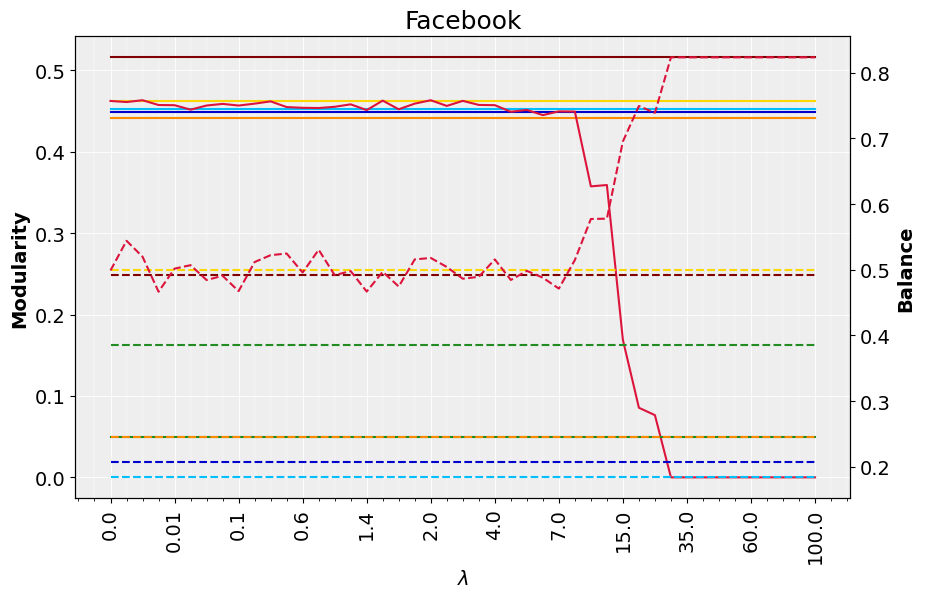

In [92]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6

    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values
    nmf_m= fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
    nmf_b = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sfsc_mod = np.repeat(g_sfsc_mod[ind], len(lam))
    sfsc_bal = np.repeat(g_sfsc_bal[ind], len(lam))
    fsc_mod = np.repeat(g_fsc_mod[ind], len(lam))
    fsc_bal = np.repeat(g_fsc_bal[ind], len(lam))
    ifsc_mod = np.repeat(i_ifsc_mod[ind], len(lam))
    ifsc_bal = np.repeat(i_ifsc_bal[ind], len(lam))
    dmon_mod = np.repeat(g_dmon_mod[ind], len(lam))
    dmon_bal = np.repeat(g_dmon_bal[ind], len(lam))
    nmf_mod = np.repeat(nmf_m[num_c-2], len(lam))
    nmf_bal = np.repeat(nmf_b[num_c-2], len(lam))
    sc_mod = np.repeat(g_sc_mod[ind], len(lam))
    sc_bal = np.repeat(g_sc_bal[ind], len(lam))

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"Facebook", fontsize=18)
    #axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14) #labelsize=14

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "deepskyblue")
    p2 = axis.plot(x, nmf_mod,  label='NMTF modularity', markersize=7, linewidth=1.5, c = "gold")
    p3 = axis.plot(x, sfsc_mod,   label='sFSC modularity', markersize=7, linewidth=1.5, c = "maroon")
    p4 = axis.plot(x, fsc_mod,  label='FSC modularity', markersize=7, linewidth=1.5, c = "darkorange")
    p5 = axis.plot(x, ifsc_mod,  label='iFair-SC modularity', markersize=7, linewidth=1.5, c = "mediumblue")
    p6 = axis.plot(x, fnmf_mod, label='iFairNMTF modularity', markersize=7, linewidth=1.5, c = "crimson")
    p7 = axis.plot(x, dmon_mod,  label='DMoN modularity', markersize=7, linewidth=1.5, c = "forestgreen")

    p8 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "deepskyblue")
    p9 = axis2.plot(x, nmf_bal, label='NMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "gold")
    p10 = axis2.plot(x, sfsc_bal,  label='sFSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "maroon")
    p11 = axis2.plot(x, fsc_bal, label='FSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "darkorange")
    p12 = axis2.plot(x, ifsc_bal, label='iFair-SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "mediumblue")
    p13 = axis2.plot(x, fnmf_bal,label='iFairNMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "crimson")
    p14 = axis.plot(x, dmon_bal,  label='DMoN balance', markersize=7, linewidth=1.5, linestyle = "--", c = "forestgreen")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend
    plots = p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("Facebook_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()

## 5.3. Pareto Analysis and IGDC calculations

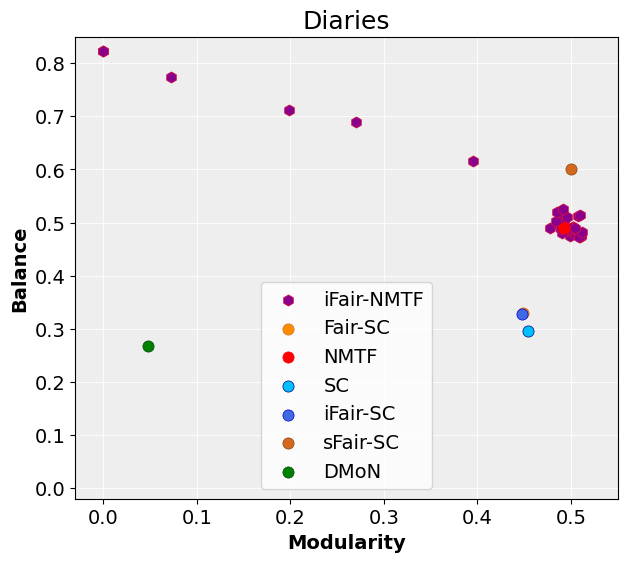

Average IGDC:
iFair_NMTF: 0.73760268492671
sFair-SC: 0.6393068002726034
Fair_SC: 0.8674401327421412
iFair-SC: 0.8702179203158087
DMoN: 1.2011267374163492
Minimum IGDC:
iFair_NMTF: 0.6908273491079481
sFair-SC: 0.6393068002726034
Fair_SC: 0.8674401327421412 
iFair-SC: 0.8702179203158087
DMoN: 1.2011267374163492
    network    attr      method  clusters (k)  avg-IGDC  min-IGDC
0  Facebook  Gender  ifair_nmtf             5  0.737603  0.690827
1  Facebook  Gender    sfair_sc             5  0.639307  0.639307
2  Facebook  Gender     fair_sc             5  0.867440  0.867440
3  Facebook  Gender    ifair_sc             5  0.870218  0.870218
4  Facebook  Gender        dmon             5  1.201127  1.201127


,network,attr,method,clusters (k),avg-IGDC,min-IGDC
0,Facebook,Gender,ifair_nmtf,5,0.737603,0.690827
1,Facebook,Gender,sfair_sc,5,0.639307,0.639307
2,Facebook,Gender,fair_sc,5,0.867440,0.867440
3,Facebook,Gender,ifair_sc,5,0.870218,0.870218
4,Facebook,Gender,dmon,5,1.201127,1.201127


In [47]:
ideal = np.asarray([1, 1])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1

figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
#axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.set_title(r"Diaries", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="darkmagenta", linewidths = 0.5, marker ="h", edgecolor ="crimson",s = 65, label='iFair-NMTF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="darkorange", linewidths = 0.5, marker ="o", edgecolor ="chocolate",s = 65, label='Fair-SC', zorder=2)
plt.scatter(i_nmtf_mod[ind], i_nmtf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="red",s = 65, label='NMTF', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="deepskyblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(i_ifsc_mod[ind], i_ifsc_bal[ind], c ="royalblue", linewidths = 0.5, marker ="o", edgecolor ="mediumblue",s = 65, label='iFair-SC', zorder=2)
plt.scatter(g_sfsc_mod[ind], g_sfsc_bal[ind], c ="chocolate", linewidths = 0.5, marker ="o", edgecolor ="saddlebrown",s = 65, label='sFair-SC', zorder=2)
plt.scatter(g_dmon_mod[ind], g_dmon_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='DMoN', zorder=2)
#plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')

#plt.hlines(0.35, -0.03, 0.7 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
#plt.vlines(0.70, -0.03, 0.35, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.03, 0.55)
plt.ylim(-0.02, 0.85)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_Facebook.svg", format='svg')
plt.show()

igdc_avg_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'avg')
igdc_avg_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\niFair_NMTF: {igdc_avg_ifnmtf}\nsFair-SC: {igdc_avg_sfsc}\nFair_SC: {igdc_avg_fsc}\niFair-SC: {igdc_avg_ifsc}\nDMoN: {igdc_avg_dmon}")

igdc_min_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'min')
igdc_min_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\niFair_NMTF: {igdc_min_ifnmtf}\nsFair-SC: {igdc_min_sfsc}\nFair_SC: {igdc_min_fsc} \niFair-SC: {igdc_min_ifsc}\nDMoN: {igdc_min_dmon}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["Facebook" for i in range(5)]
col2 = ["Gender" for i in range(5)]
col3 = ["ifair_nmtf", "sfair_sc", "fair_sc", "ifair_sc", "dmon"]
col4 = [num_c for i in range(5)]
col5 = [igdc_avg_ifnmtf, igdc_avg_sfsc, igdc_avg_fsc, igdc_avg_ifsc, igdc_avg_dmon]
col6 = [igdc_min_ifnmtf, igdc_min_sfsc, igdc_min_fsc, igdc_min_ifsc, igdc_min_dmon]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_Facebook_.csv', index=False)


# 6) Friendship

In [93]:
path1 = "data/School/"
path2 = "Results/Final/combined results/"

Friendship_balance =  0.6710526315789473

all_competitor = pd.read_csv(path2 + "Friendship_all.csv")
fair_nmf = pd.read_csv(path2 + "Friendship_k_lam_gridsearch_FNMTF.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [Friendship_balance for i in range(len(k))]

## 6.1. Comparisons on $Q ~~ \text{and} ~~Balance$

C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\2391365600.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bh" (-> color='b'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\2391365600.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mv" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\2391365600.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mh" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7

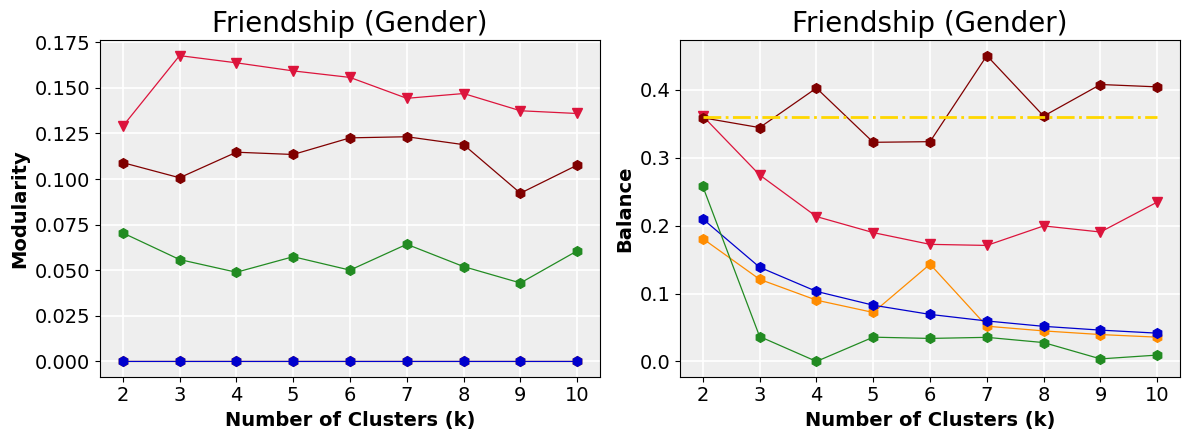

In [105]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5)) #(14,6) with legend. (12,4.5) no legend
styles = ["-bh", "-r^", "-bh", "-mv", "-mh", "-kh", "-gh"]  # ,["-b*","--c*",":k*"]

#lmbd = [0.1, 4, 4, 3.5, 5, 2, 0.8, 1.4, 1.6]
lmbd = [0.005, 0.8, 0.2, 1.8, 1, 0.8, 1, 0.2, 0.6]

i_fnmtf_mod, i_fnmtf_bal = [],[]
for i,lam in enumerate(lmbd):
    cluster_rows = fair_nmf[fair_nmf['clusters (k)'] == i+2]
    i_fnmtf_mod.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["Q_FNMTF"].values )
    i_fnmtf_bal.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["B_FNMTF"].values )

#i_fnmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["Q_FNMTF"].values
#i_fnmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["B_FNMTF"].values
#df = fair_nmf.loc[fair_nmf.groupby('clusters (k)')['B_FNMTF'].idxmax()]
#i_fnmtf_mod = df["Q_FNMTF"].values
#i_fnmtf_bal = df["B_FNMTF"].values

i_nmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
i_nmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values

g_sfsc_mod = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["modularity"].values
i_ifsc_mod = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["modularity"].values
g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values
g_dmon_mod = all_competitor.loc[all_competitor['method'] == "DMoN"]["modularity"].values

g_sfsc_bal = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["average balance"].values
i_ifsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_fsc_bal = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values
g_dmon_bal = all_competitor.loc[all_competitor['method'] == "DMoN"]["average balance"].values

# plotting DrugNet-Gender graphs
#axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[0].plot(k, i_nmtf_mod, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[0].plot(k[0:9], g_sfsc_mod[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[0].plot(k[0:9], g_dmon_mod[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

#axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[1].plot(k, i_nmtf_bal, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[1].plot(k[0:9], g_fsc_bal[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[1].plot(k[0:9], i_fnmtf_bal[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[1].plot(k[0:9], i_ifsc_bal[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[1].plot(k[0:9], g_sfsc_bal[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[1].plot(k[0:9], g_dmon_bal[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

axis[1].plot(k[0:9], g_b[0:9], "-.", color="gold", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k[0:9])
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("Friendship (Gender)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("Friendship_new_plots.svg", format='svg')
plt.show()

## 6.2. Parameter ($\lambda$) analysis


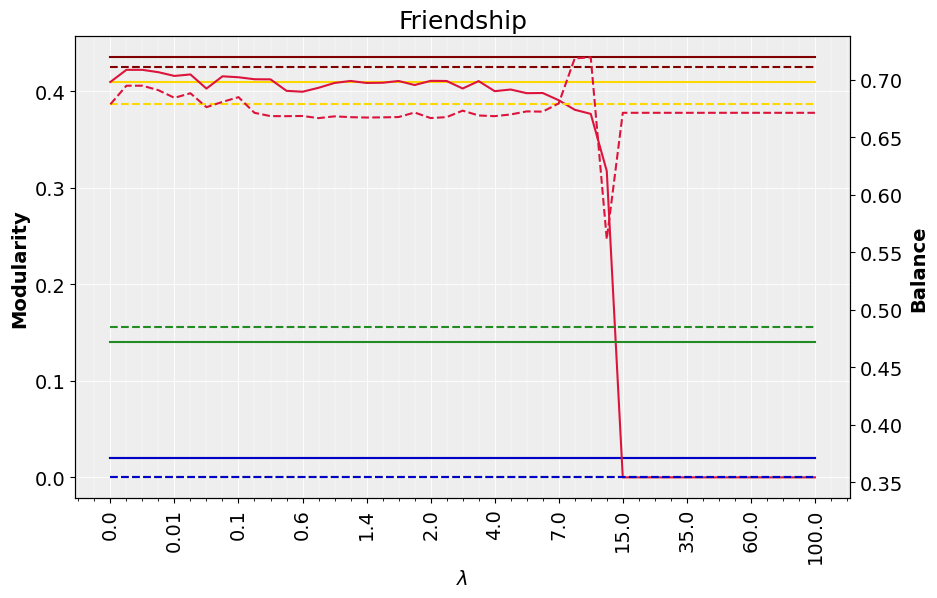

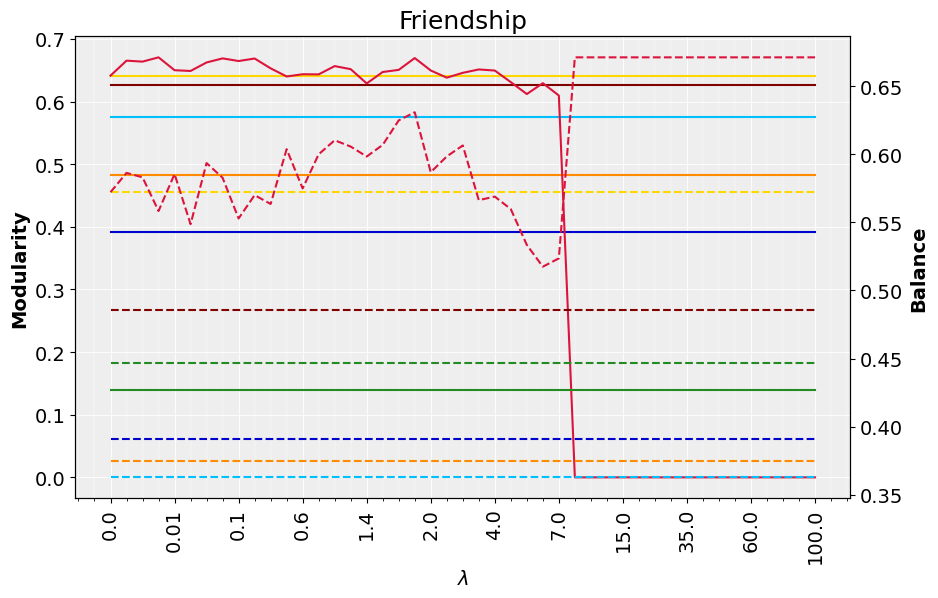

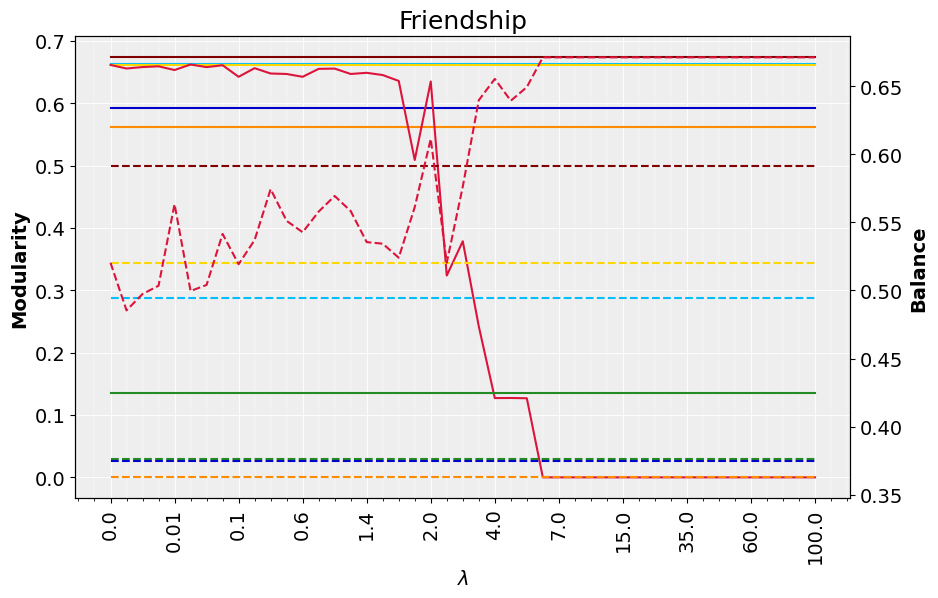

In [95]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6

    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values
    nmf_m= fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
    nmf_b = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sfsc_mod = np.repeat(g_sfsc_mod[ind], len(lam))
    sfsc_bal = np.repeat(g_sfsc_bal[ind], len(lam))
    fsc_mod = np.repeat(g_fsc_mod[ind], len(lam))
    fsc_bal = np.repeat(g_fsc_bal[ind], len(lam))
    ifsc_mod = np.repeat(i_ifsc_mod[ind], len(lam))
    ifsc_bal = np.repeat(i_ifsc_bal[ind], len(lam))
    dmon_mod = np.repeat(g_dmon_mod[ind], len(lam))
    dmon_bal = np.repeat(g_dmon_bal[ind], len(lam))
    nmf_mod = np.repeat(nmf_m[num_c-2], len(lam))
    nmf_bal = np.repeat(nmf_b[num_c-2], len(lam))
    sc_mod = np.repeat(g_sc_mod[ind], len(lam))
    sc_bal = np.repeat(g_sc_bal[ind], len(lam))

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"Friendship", fontsize=18)
    #axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14) #labelsize=14

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "deepskyblue")
    p2 = axis.plot(x, nmf_mod,  label='NMTF modularity', markersize=7, linewidth=1.5, c = "gold")
    p3 = axis.plot(x, sfsc_mod,   label='sFSC modularity', markersize=7, linewidth=1.5, c = "maroon")
    p4 = axis.plot(x, fsc_mod,  label='FSC modularity', markersize=7, linewidth=1.5, c = "darkorange")
    p5 = axis.plot(x, ifsc_mod,  label='iFair-SC modularity', markersize=7, linewidth=1.5, c = "mediumblue")
    p6 = axis.plot(x, fnmf_mod, label='iFairNMTF modularity', markersize=7, linewidth=1.5, c = "crimson")
    p7 = axis.plot(x, dmon_mod,  label='DMoN modularity', markersize=7, linewidth=1.5, c = "forestgreen")

    p8 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "deepskyblue")
    p9 = axis2.plot(x, nmf_bal, label='NMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "gold")
    p10 = axis2.plot(x, sfsc_bal,  label='sFSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "maroon")
    p11 = axis2.plot(x, fsc_bal, label='FSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "darkorange")
    p12 = axis2.plot(x, ifsc_bal, label='iFair-SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "mediumblue")
    p13 = axis2.plot(x, fnmf_bal,label='iFairNMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "crimson")
    p14 = axis.plot(x, dmon_bal,  label='DMoN balance', markersize=7, linewidth=1.5, linestyle = "--", c = "forestgreen")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend
    plots = p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("Friendship_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()
    

## 6.3. Pareto Analysis and IGDC calculations

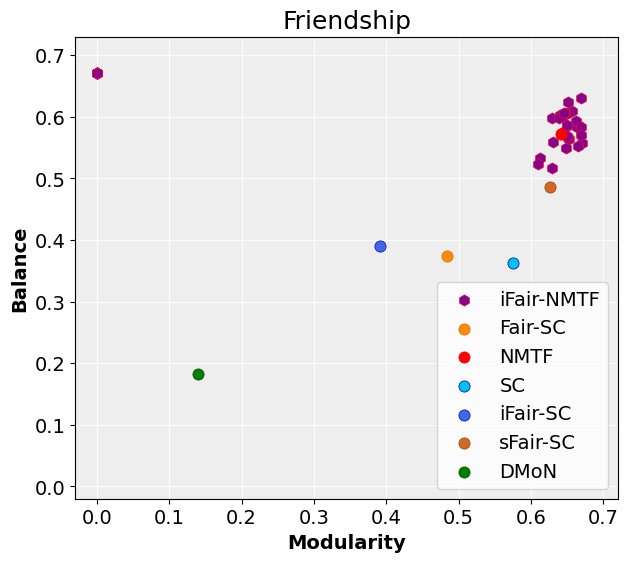

Average IGDC:
iFair_NMTF: 0.7275921007134496
sFair-SC: 0.6357978307633458
Fair_SC: 0.8112372049020182
iFair-SC: 0.8608821664530123
DMoN: 1.1864719640333277
Minimum IGDC:
iFair_NMTF: 0.4956055044239084
sFair-SC: 0.6357978307633458
Fair_SC: 0.8112372049020182 
iFair-SC: 0.8608821664530123
DMoN: 1.1864719640333277
      network    attr      method  clusters (k)  avg-IGDC  min-IGDC
0  Friendship  Gender  ifair_nmtf             5  0.727592  0.495606
1  Friendship  Gender    sfair_sc             5  0.635798  0.635798
2  Friendship  Gender     fair_sc             5  0.811237  0.811237
3  Friendship  Gender    ifair_sc             5  0.860882  0.860882
4  Friendship  Gender        dmon             5  1.186472  1.186472


,network,attr,method,clusters (k),avg-IGDC,min-IGDC
0,Friendship,Gender,ifair_nmtf,5,0.727592,0.495606
1,Friendship,Gender,sfair_sc,5,0.635798,0.635798
2,Friendship,Gender,fair_sc,5,0.811237,0.811237
3,Friendship,Gender,ifair_sc,5,0.860882,0.860882
4,Friendship,Gender,dmon,5,1.186472,1.186472


In [58]:
ideal = np.asarray([1, 1])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1

figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
#axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.set_title(r"Friendship", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="darkmagenta", linewidths = 0.5, marker ="h", edgecolor ="crimson",s = 65, label='iFair-NMTF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="darkorange", linewidths = 0.5, marker ="o", edgecolor ="chocolate",s = 65, label='Fair-SC', zorder=2)
plt.scatter(i_nmtf_mod[ind], i_nmtf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="red",s = 65, label='NMTF', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="deepskyblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(i_ifsc_mod[ind], i_ifsc_bal[ind], c ="royalblue", linewidths = 0.5, marker ="o", edgecolor ="mediumblue",s = 65, label='iFair-SC', zorder=2)
plt.scatter(g_sfsc_mod[ind], g_sfsc_bal[ind], c ="chocolate", linewidths = 0.5, marker ="o", edgecolor ="saddlebrown",s = 65, label='sFair-SC', zorder=2)
plt.scatter(g_dmon_mod[ind], g_dmon_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='DMoN', zorder=2)
#plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')

#plt.hlines(0.35, -0.03, 0.7 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
#plt.vlines(0.70, -0.03, 0.35, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.03, 0.72)
plt.ylim(-0.02, 0.73)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_Friendship.svg", format='svg')
plt.show()

igdc_avg_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'avg')
igdc_avg_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\niFair_NMTF: {igdc_avg_ifnmtf}\nsFair-SC: {igdc_avg_sfsc}\nFair_SC: {igdc_avg_fsc}\niFair-SC: {igdc_avg_ifsc}\nDMoN: {igdc_avg_dmon}")

igdc_min_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'min')
igdc_min_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\niFair_NMTF: {igdc_min_ifnmtf}\nsFair-SC: {igdc_min_sfsc}\nFair_SC: {igdc_min_fsc} \niFair-SC: {igdc_min_ifsc}\nDMoN: {igdc_min_dmon}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["Friendship" for i in range(5)]
col2 = ["Gender" for i in range(5)]
col3 = ["ifair_nmtf", "sfair_sc", "fair_sc", "ifair_sc", "dmon"]
col4 = [num_c for i in range(5)]
col5 = [igdc_avg_ifnmtf, igdc_avg_sfsc, igdc_avg_fsc, igdc_avg_ifsc, igdc_avg_dmon]
col6 = [igdc_min_ifnmtf, igdc_min_sfsc, igdc_min_fsc, igdc_min_ifsc, igdc_min_dmon]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_Friendship_.csv', index=False)


# 7) NBA

In [96]:
path1 = "data/NBA/"
path2 = "Results/Final/combined results/"

A = (pd.read_csv(path1 + "NBAgraph.csv", header=None)).to_numpy()
F = (pd.read_csv(path1 + "NBAfeature.csv", header=None)).to_numpy()

all_in_one = np.ones(F.shape[0])
uniqe_vals, count = np.unique(F, return_counts=True)
NBA_balance = min(count)/max(count)

print(len(F), len(A))
print("Dataset balance = ", NBA_balance)

all_competitor = pd.read_csv(path2 + "NBA_all.csv")
fair_nmf = pd.read_csv(path2 + "NBA_k_lam_gridsearch_FNMTF.csv")

k = np.unique(fair_nmf["clusters (k)"].values)
g_b = [NBA_balance for i in range(len(k))]

400 400
Dataset balance =  0.36054421768707484


## 7.1. Comparisons on $Q ~~ \text{and} ~~Balance$

C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\300528537.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bh" (-> color='b'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\300528537.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mv" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\300528537.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mh" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7, l

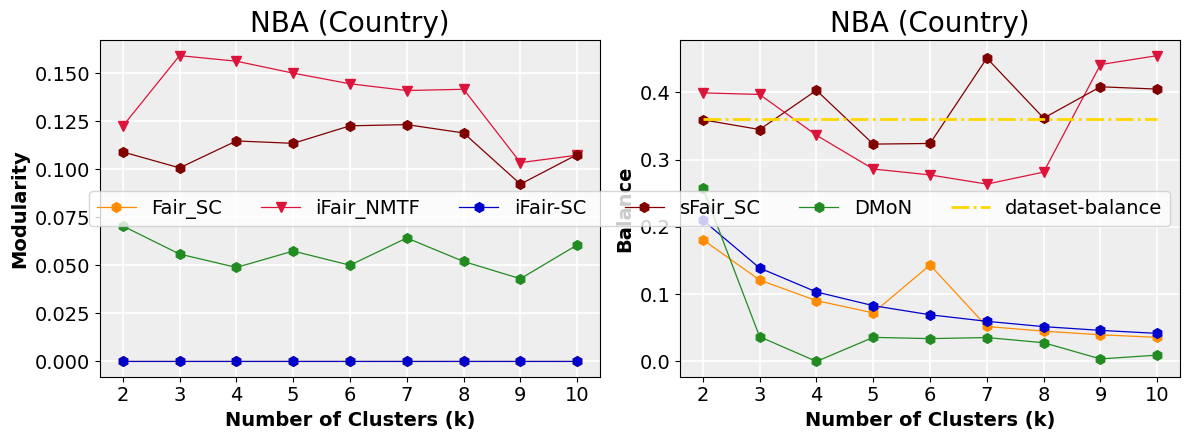

In [97]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5)) #(14,6) with legend. (12,4.5) no legend
styles = ["-bh", "-r^", "-bh", "-mv", "-mh", "-kh", "-gh"]  # ,["-b*","--c*",":k*"]

#lmbd = [0.0075, 4, 4, 9, 90, 100, 30, 10-15, 15-6]
#lmbd = [0.3, 5, 8, 30, 7, 8, 2.8, 50, 100]
lmbd = [0.3, 5, 8, 30, 7, 8, 2.8, 50, 6]
lmbd = [0.3, 5, 8, 9, 7, 8, 2.8, 50, 100]

i_fnmtf_mod, i_fnmtf_bal = [],[]
for i,lam in enumerate(lmbd):
    cluster_rows = fair_nmf[fair_nmf['clusters (k)'] == i+2]
    i_fnmtf_mod.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["Q_FNMTF"].values )
    i_fnmtf_bal.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["B_FNMTF"].values )

#i_fnmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["Q_FNMTF"].values
#i_fnmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["B_FNMTF"].values
#df = fair_nmf.loc[fair_nmf.groupby('clusters (k)')['B_FNMTF'].idxmax()]
#i_fnmtf_mod = df["Q_FNMTF"].values
#i_fnmtf_bal = df["B_FNMTF"].values

i_nmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
i_nmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values

g_sfsc_mod = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["modularity"].values
i_ifsc_mod = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["modularity"].values
g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values
g_dmon_mod = all_competitor.loc[all_competitor['method'] == "DMoN"]["modularity"].values

g_sfsc_bal = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["average balance"].values
i_ifsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_fsc_bal = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values
g_dmon_bal = all_competitor.loc[all_competitor['method'] == "DMoN"]["average balance"].values

# plotting DrugNet-Gender graphs
#axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[0].plot(k, i_nmtf_mod, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[0].plot(k[0:9], g_sfsc_mod[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[0].plot(k[0:9], g_dmon_mod[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

#axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[1].plot(k, i_nmtf_bal, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[1].plot(k[0:9], g_fsc_bal[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[1].plot(k[0:9], i_fnmtf_bal[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[1].plot(k[0:9], i_ifsc_bal[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[1].plot(k[0:9], g_sfsc_bal[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[1].plot(k[0:9], g_dmon_bal[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

axis[1].plot(k[0:9], g_b[0:9], "-.", color="gold", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k[0:9])
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("NBA (Country)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=6, fontsize=14)

plt.savefig("NBA_new_plots.svg", format='svg')
plt.show()

## 7.2. Parameter ($\lambda$) analysis

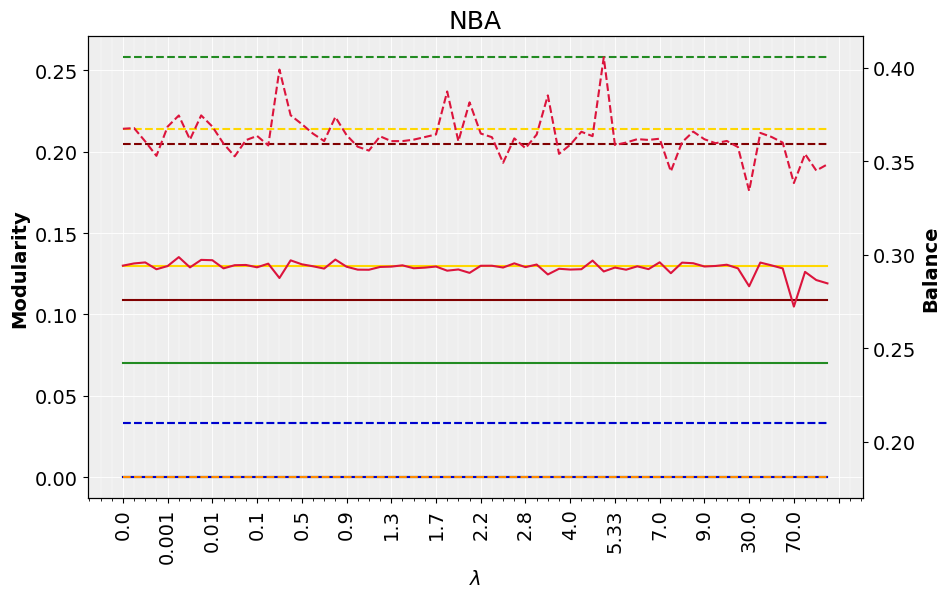

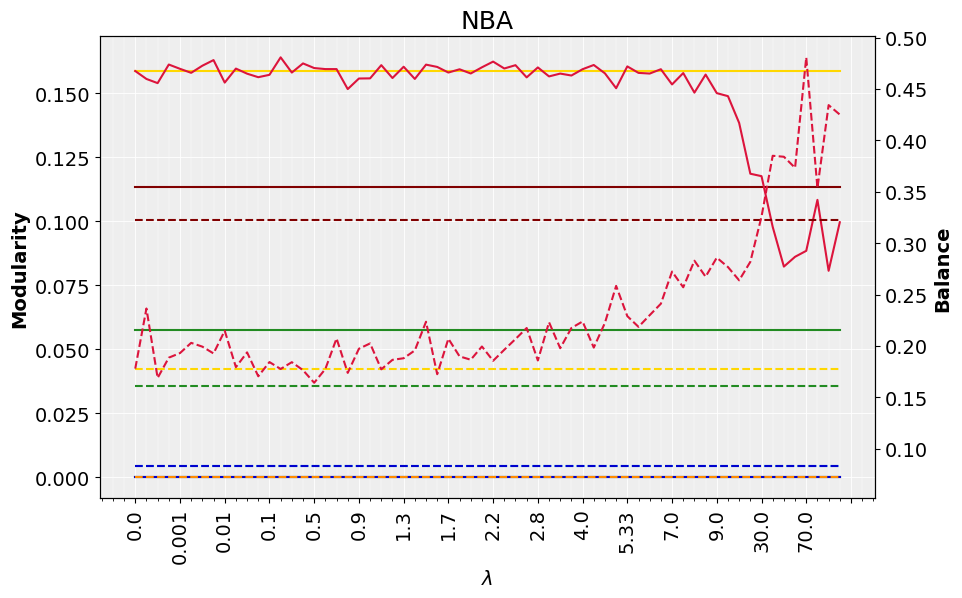

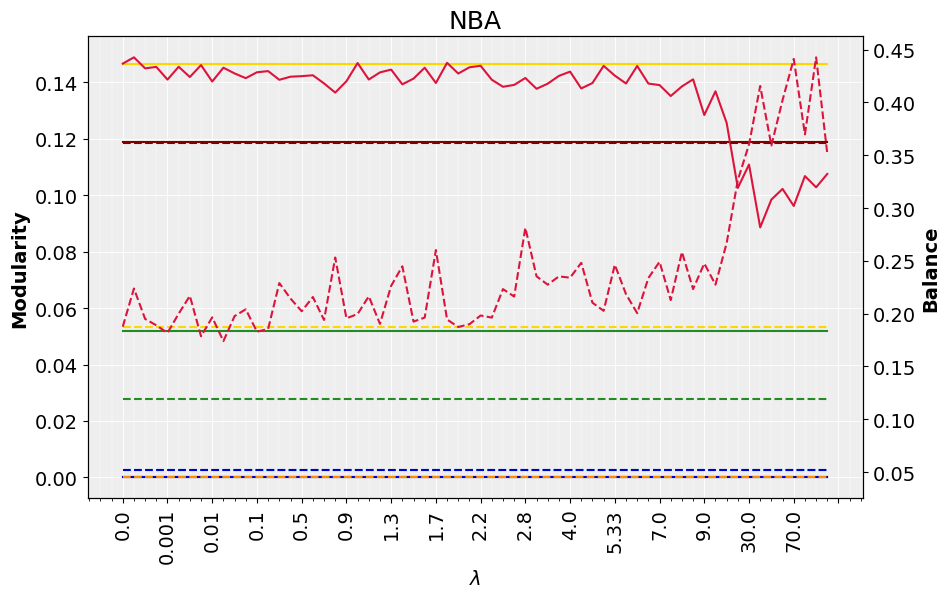

In [98]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6

    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values
    nmf_m= fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
    nmf_b = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sfsc_mod = np.repeat(g_sfsc_mod[ind], len(lam))
    sfsc_bal = np.repeat(g_sfsc_bal[ind], len(lam))
    fsc_mod = np.repeat(g_fsc_mod[ind], len(lam))
    fsc_bal = np.repeat(g_fsc_bal[ind], len(lam))
    ifsc_mod = np.repeat(i_ifsc_mod[ind], len(lam))
    ifsc_bal = np.repeat(i_ifsc_bal[ind], len(lam))
    dmon_mod = np.repeat(g_dmon_mod[ind], len(lam))
    dmon_bal = np.repeat(g_dmon_bal[ind], len(lam))
    nmf_mod = np.repeat(nmf_m[num_c-2], len(lam))
    nmf_bal = np.repeat(nmf_b[num_c-2], len(lam))
    sc_mod = np.repeat(g_sc_mod[ind], len(lam))
    sc_bal = np.repeat(g_sc_bal[ind], len(lam))

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"NBA", fontsize=18)
    #axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14) #labelsize=14

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "deepskyblue")
    p2 = axis.plot(x, nmf_mod,  label='NMTF modularity', markersize=7, linewidth=1.5, c = "gold")
    p3 = axis.plot(x, sfsc_mod,   label='sFSC modularity', markersize=7, linewidth=1.5, c = "maroon")
    p4 = axis.plot(x, fsc_mod,  label='FSC modularity', markersize=7, linewidth=1.5, c = "darkorange")
    p5 = axis.plot(x, ifsc_mod,  label='iFair-SC modularity', markersize=7, linewidth=1.5, c = "mediumblue")
    p6 = axis.plot(x, fnmf_mod, label='iFairNMTF modularity', markersize=7, linewidth=1.5, c = "crimson")
    p7 = axis.plot(x, dmon_mod,  label='DMoN modularity', markersize=7, linewidth=1.5, c = "forestgreen")

    p8 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "deepskyblue")
    p9 = axis2.plot(x, nmf_bal, label='NMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "gold")
    p10 = axis2.plot(x, sfsc_bal,  label='sFSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "maroon")
    p11 = axis2.plot(x, fsc_bal, label='FSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "darkorange")
    p12 = axis2.plot(x, ifsc_bal, label='iFair-SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "mediumblue")
    p13 = axis2.plot(x, fnmf_bal,label='iFairNMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "crimson")
    p14 = axis.plot(x, dmon_bal,  label='DMoN balance', markersize=7, linewidth=1.5, linestyle = "--", c = "forestgreen")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend
    plots = p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=4, fontsize=14)
    plt.savefig("NBA_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()
    

## 7.3. Pareto Analysis and IGDC calculations

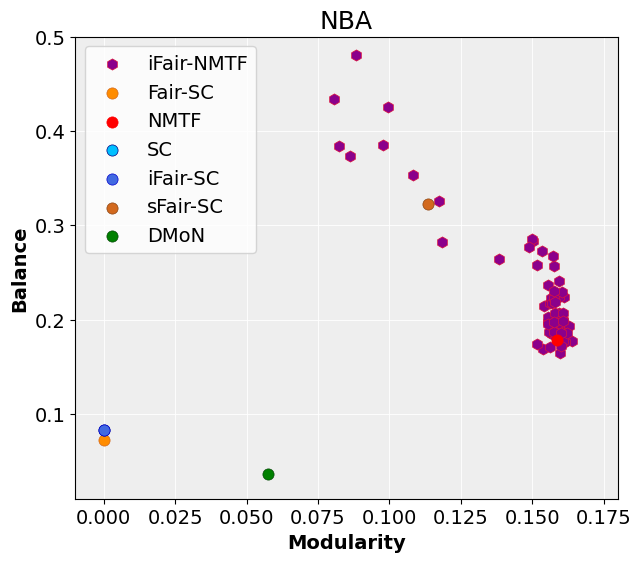

Average IGDC:
iFair_NMTF: 1.1478321330097032
sFair-SC: 1.1155538418392972
Fair_SC: 1.3641400836130662
iFair-SC: 1.3568903066004057
DMoN: 1.3484251544682402
Minimum IGDC:
iFair_NMTF: 1.049102180235457
sFair-SC: 1.1155538418392972
Fair_SC: 1.3641400836130662 
iFair-SC: 1.3568903066004057
DMoN: 1.3484251544682402
  network     attr      method  clusters (k)  avg-IGDC  min-IGDC
0     NBA  Country  ifair_nmtf             5  1.147832  1.049102
1     NBA  Country    sfair_sc             5  1.115554  1.115554
2     NBA  Country     fair_sc             5  1.364140  1.364140
3     NBA  Country    ifair_sc             5  1.356890  1.356890
4     NBA  Country        dmon             5  1.348425  1.348425


,network,attr,method,clusters (k),avg-IGDC,min-IGDC
0,NBA,Country,ifair_nmtf,5,1.147832,1.049102
1,NBA,Country,sfair_sc,5,1.115554,1.115554
2,NBA,Country,fair_sc,5,1.364140,1.364140
3,NBA,Country,ifair_sc,5,1.356890,1.356890
4,NBA,Country,dmon,5,1.348425,1.348425


In [71]:
ideal = np.asarray([1, 1])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1

figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
#axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.set_title(r"NBA", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="darkmagenta", linewidths = 0.5, marker ="h", edgecolor ="crimson",s = 65, label='iFair-NMTF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="darkorange", linewidths = 0.5, marker ="o", edgecolor ="chocolate",s = 65, label='Fair-SC', zorder=2)
plt.scatter(i_nmtf_mod[ind], i_nmtf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="red",s = 65, label='NMTF', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="deepskyblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(i_ifsc_mod[ind], i_ifsc_bal[ind], c ="royalblue", linewidths = 0.5, marker ="o", edgecolor ="mediumblue",s = 65, label='iFair-SC', zorder=2)
plt.scatter(g_sfsc_mod[ind], g_sfsc_bal[ind], c ="chocolate", linewidths = 0.5, marker ="o", edgecolor ="saddlebrown",s = 65, label='sFair-SC', zorder=2)
plt.scatter(g_dmon_mod[ind], g_dmon_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='DMoN', zorder=2)
#plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')

#plt.hlines(0.35, -0.03, 0.7 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
#plt.vlines(0.70, -0.03, 0.35, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.01, 0.18)
plt.ylim(0.01, 0.5)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_NBA.svg", format='svg')
plt.show()

igdc_avg_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'avg')
igdc_avg_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\niFair_NMTF: {igdc_avg_ifnmtf}\nsFair-SC: {igdc_avg_sfsc}\nFair_SC: {igdc_avg_fsc}\niFair-SC: {igdc_avg_ifsc}\nDMoN: {igdc_avg_dmon}")

igdc_min_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'min')
igdc_min_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\niFair_NMTF: {igdc_min_ifnmtf}\nsFair-SC: {igdc_min_sfsc}\nFair_SC: {igdc_min_fsc} \niFair-SC: {igdc_min_ifsc}\nDMoN: {igdc_min_dmon}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["NBA" for i in range(5)]
col2 = ["Country" for i in range(5)]
col3 = ["ifair_nmtf", "sfair_sc", "fair_sc", "ifair_sc", "dmon"]
col4 = [num_c for i in range(5)]
col5 = [igdc_avg_ifnmtf, igdc_avg_sfsc, igdc_avg_fsc, igdc_avg_ifsc, igdc_avg_dmon]
col6 = [igdc_min_ifnmtf, igdc_min_sfsc, igdc_min_fsc, igdc_min_ifsc, igdc_min_dmon]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_NBA_.csv', index=False)


# Convergence charts 

In [188]:
from algorithms import *
from utils import *
from evaluations import *
import torch
import numpy as np
import matplotlib as mpl

eps = torch.tensor(0.000001)

## 2) Drugnet

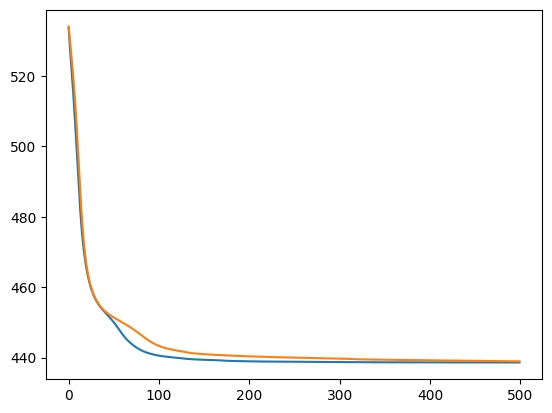

In [185]:
path1 = "data/DrugNet/"
path2 = "results/New/DrugNet/"

A = (pd.read_csv(path1 + "DrugNetgraph.csv", header=None)).to_numpy()
F = (pd.read_csv(path1 + "DrugNetfeature.csv", header=None)).to_numpy()

F_ethn = F[:,0]

k = 5
lambdas = [0.1,1]

Adj = torch.tensor(A, dtype=torch.float)
standard_groups = reflow_clusters(F_ethn.ravel())
groups = np.transpose(standard_groups)
L, Ln, Lp = joint_Laplacian(groups)

iter = 500
err_drug = torch.zeros((2,iter))
for idx,lam in enumerate(lambdas):

    # iFair_NMTF
    H1, W1, err_drug[idx] = iFairNMTF(Adj, L, Ln, Lp, num_c, lam, iter)

## 3) Diaries

In [202]:
path1 = "data/School/"
path2 = "results/New/School/"

A = (pd.read_csv(path1 + "diaries.csv", header=None)).to_numpy()
F = (pd.read_csv(path1 + "cd_attr.csv", header=None)).to_numpy()

k = 5
lambdas = [0,1]

Adj = torch.tensor(A, dtype=torch.float)
standard_groups = reflow_clusters(F.ravel())
groups = np.transpose(standard_groups)
L, Ln, Lp = joint_Laplacian(groups)

iter = 500
err_diaries = torch.zeros((2,iter))
for idx,lam in enumerate(lambdas):

    # iFair_NMTF
    H1, W1, err_diaries[idx] = iFairNMTF(Adj, L, Ln, Lp, num_c, lam, iter)

## 4) Facebook

In [207]:
path1 = "data/School/"
path2 = "results/New/School/"

A = (pd.read_csv(path1 + "friendship.csv", header=None)).to_numpy()
F = (pd.read_csv(path1 + "fr_attr.csv", header=None)).to_numpy()

k = 5
lambdas = [0,1]

Adj = torch.tensor(A, dtype=torch.float)
standard_groups = reflow_clusters(F.ravel())
groups = np.transpose(standard_groups)
L, Ln, Lp = joint_Laplacian(groups)

iter = 500
err_fb = torch.zeros((2,iter))
for idx,lam in enumerate(lambdas):

    # iFair_NMTF
    H1, W1, err_fb[idx] = iFairNMTF(Adj, L, Ln, Lp, num_c, lam, iter)

## 5) plot both

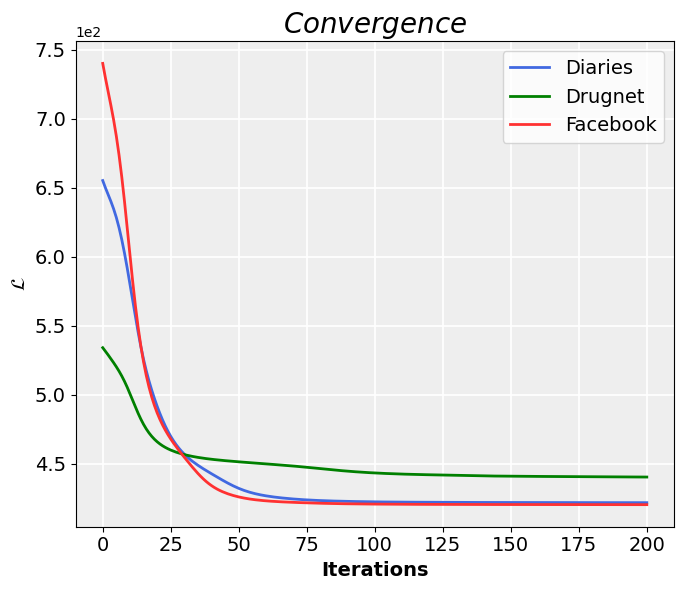

In [224]:
mpl.rcParams.update(mpl.rcParamsDefault)
figure, ax1 = plt.subplots(1, 1, figsize=(7, 6))

range = np.arange(201)

ax1.plot(range, err_diaries[1,:len(range)], label=r'Diaries', linewidth=2, c = "royalblue")
ax1.plot(range, err_drug[1,:len(range)], label=r'Drugnet', linewidth=2, c = "green")
ax1.plot(range, err_fb[1,:len(range)], label=r'Facebook', linewidth=2, c = "#FF3131")

#axis[i].set_xticks(k)
ax1.set_xlabel("Iterations", fontsize=14, fontweight='bold')

ax1.set_ylabel(r"$\mathcal{L}$", fontsize=14, fontweight='bold')

ax1.set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid. # Give plot a gray background like ggplot.
ax1.grid(which='major', color='white', linewidth=1.2)
ax1.grid(which='minor', color='white', linewidth=0.6)

ax1.tick_params(axis='both', labelsize=14)

#ax1.set_title("LastFM", fontsize=20)
#ax2.set_title("Facebook", fontsize=20)
ax1.set_title(r"$Convergence$", fontsize=20)


figure.tight_layout()
ax1.legend(loc="best", fontsize=14)

ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.savefig("convergence_200.svg", format='svg')
plt.show()

In [440]:
mpl.rcParams.update(mpl.rcParamsDefault)